In [250]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import pandas as pd

import pickle
import h5py
import pandas

plt.rcParams["figure.figsize"] = (15,10)

First, we import the psuedo-experiment data, as well as the known background for comparison purposes.

In [251]:
data_high = pandas.read_hdf('data_highLumi_pt_250_500.h5')
data_high

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,491.273762,0.885859,-1.607844,58.540714,0.027848,0.000236,10.916629,0.002658,0.723524,0.576035,0.451149,0.796152,0.783197,0.105238
1,443.077741,-0.850850,-1.808610,109.261432,0.111414,0.003361,2.430250,0.003674,1.081477,0.488437,0.431396,0.451639,0.883217,0.254729
2,487.700656,-0.848095,3.101697,80.398065,0.059299,0.000973,4.666474,0.004545,0.885087,0.637212,0.476032,0.719942,0.747054,0.231983
3,474.234962,1.501633,-1.656456,90.085535,0.061264,0.001368,5.948416,0.001163,1.354343,0.698983,0.668163,0.516104,0.955908,0.096045
4,485.597724,1.021424,1.742641,119.889999,0.133209,0.003223,1.363644,0.001526,0.905440,0.354629,0.219775,0.391665,0.619733,0.406962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40339,463.278465,1.715067,-2.254925,79.321004,0.066043,0.001196,4.150582,0.000477,0.837033,0.602315,0.573286,0.719583,0.951804,0.266005
40340,418.496927,-2.246578,1.679789,44.635757,0.030060,0.000199,7.316158,0.000066,0.922342,0.801027,0.579431,0.868470,0.723360,0.037072
40341,474.840070,-0.981801,3.135062,55.302586,0.031332,0.000290,9.421780,0.003184,0.814772,0.695005,0.503360,0.853005,0.724255,0.102287
40342,460.901330,0.764519,-0.736565,72.333900,0.037743,0.000560,10.421032,0.005506,0.910557,0.675996,0.491189,0.742398,0.726616,0.059109


In [44]:
data_low = pandas.read_hdf('data_lowLumi_pt_250_500.h5')
data_low

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,499.974801,-0.340430,-3.124063,35.763836,0.016922,0.000061,12.505765,0.003937,1.181578,0.797111,0.724045,0.674615,0.908337,0.026663
1,470.525978,1.447995,-0.463162,79.069978,0.052447,0.000801,5.549873,0.000965,0.924677,0.752034,0.679503,0.813294,0.903554,0.136669
2,455.009985,-1.672870,-2.260314,56.401982,0.030301,0.000229,8.234025,0.000417,0.892902,0.630183,0.538919,0.705769,0.855178,0.106421
3,387.414081,-1.002107,-2.688377,77.412447,0.092790,0.001888,2.363279,0.002206,0.975771,0.461347,0.338407,0.472803,0.733519,0.324391
4,442.472789,-1.103515,-2.367580,86.479013,0.049532,0.000909,7.483889,0.002174,0.782566,0.668635,0.432825,0.854414,0.647326,0.041830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,485.528722,1.349769,1.178191,101.540846,0.093551,0.002513,3.069102,0.002492,1.006359,0.811150,0.664146,0.806025,0.818770,0.164820
4056,472.231371,1.874326,-0.785502,48.174004,0.025348,0.000161,9.860763,0.000308,1.036714,0.918382,0.721017,0.885858,0.785095,0.038309
4057,407.594270,0.494450,-1.839265,67.141046,0.061750,0.000890,3.778698,0.003875,0.957798,0.730431,0.548445,0.762615,0.750852,0.298864
4058,417.108347,-1.391452,-0.368711,126.643493,0.163618,0.007312,1.669434,0.001432,1.184487,0.673570,0.573632,0.568659,0.851630,0.373660


In [45]:
qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
data_qcd = pickle.load(qcd)
data_qcd.keys()
qcd.close()

In [46]:
higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
data_higgs = pickle.load(higgs)
data_higgs.keys()
higgs.close()

# 1. High luminosity data

We'll first plot the probability density distribution of our data, and the expected signal/background, with respect to the features.

To avoid excessive copy & paste, we will define a function to plot the data more effectively.

In [352]:
def plotfeature(feature, title, data1, label1, data_bg, label_bg, data_sg, label_sg, lower, upper):
    plt.suptitle(title, fontsize=30)
    plt.xlabel(feature + ' value', fontsize = 24)
    plt.ylabel('Probability density', fontsize = 24)
    plt.tick_params(labelsize = 24)
    #plt.yscale('log')
    plt.hist(data1[feature], bins = np.linspace(lower,upper,50), density = True, alpha = 0.5, label = label1)
    plt.hist(data_bg[feature], bins = np.linspace(lower,upper,50), density = True, alpha = 0.5, label = label_bg)
    plt.hist(data_sg[feature], bins = np.linspace(lower,upper,50), density = True, alpha = 0.5, label = label_sg)
    plt.legend()
    plt.show()

In [350]:
def plothighlum(feature, lower, upper):
    title = 'High luminosity data distribution of ' + feature
    plotfeature(feature, title, data_high, 'High luminosity data', data_qcd, 'Expected background', data_higgs, 'Expected signal', lower, upper)

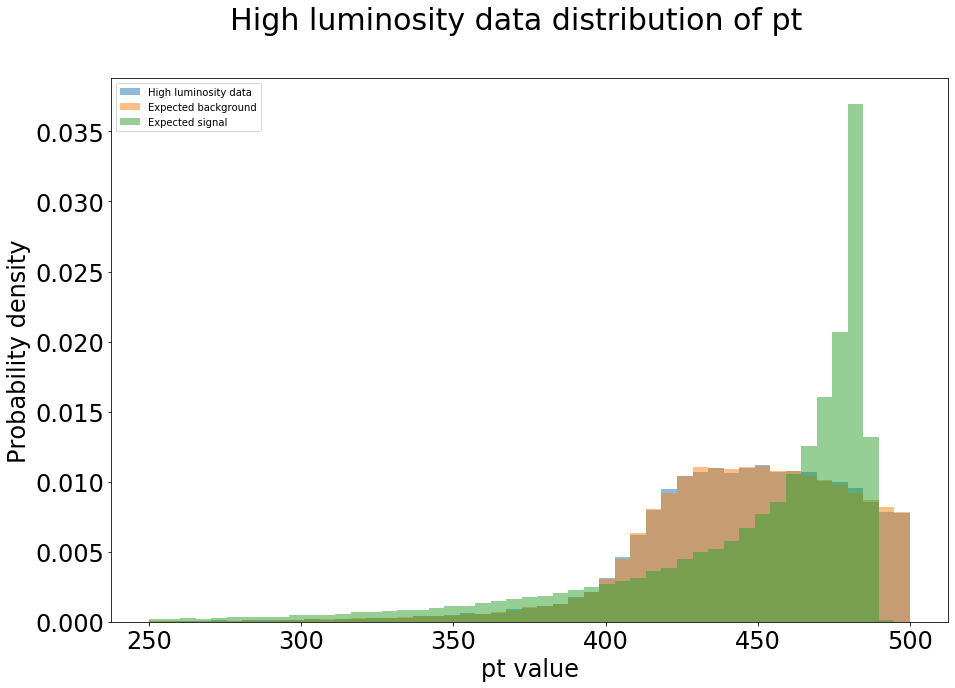

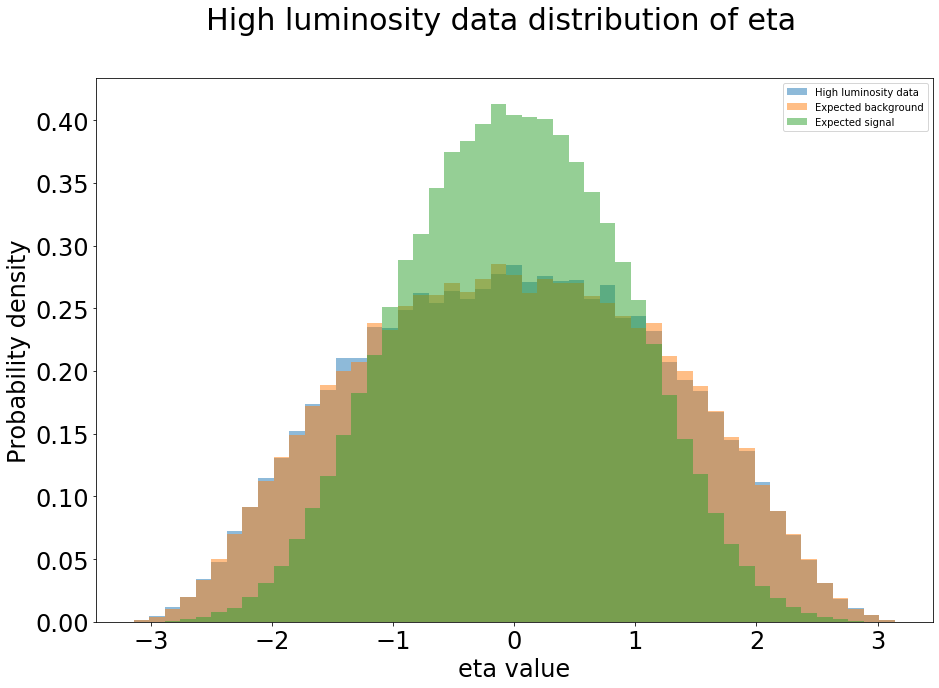

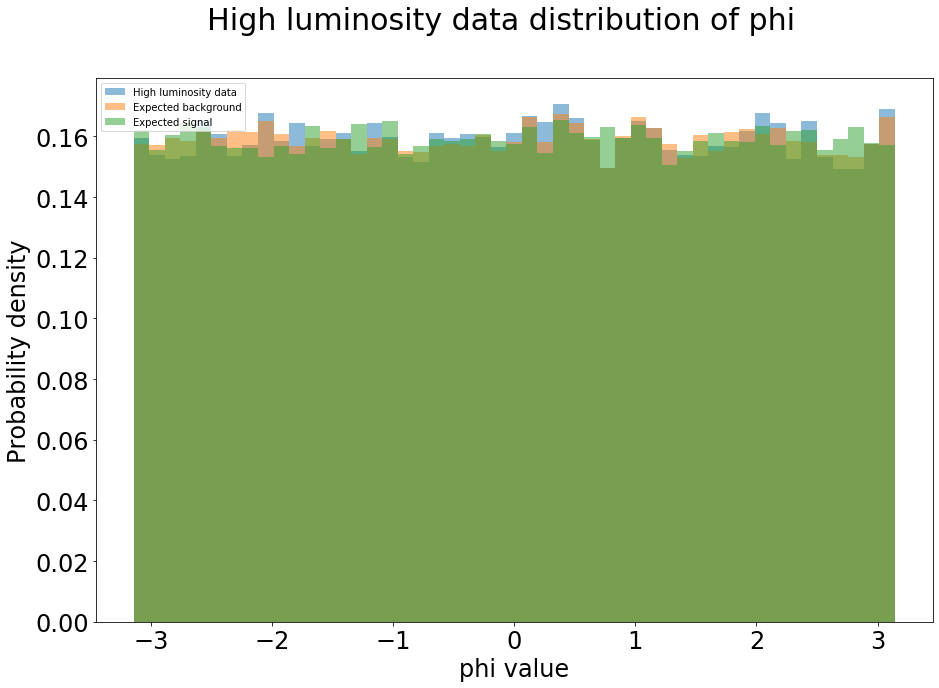

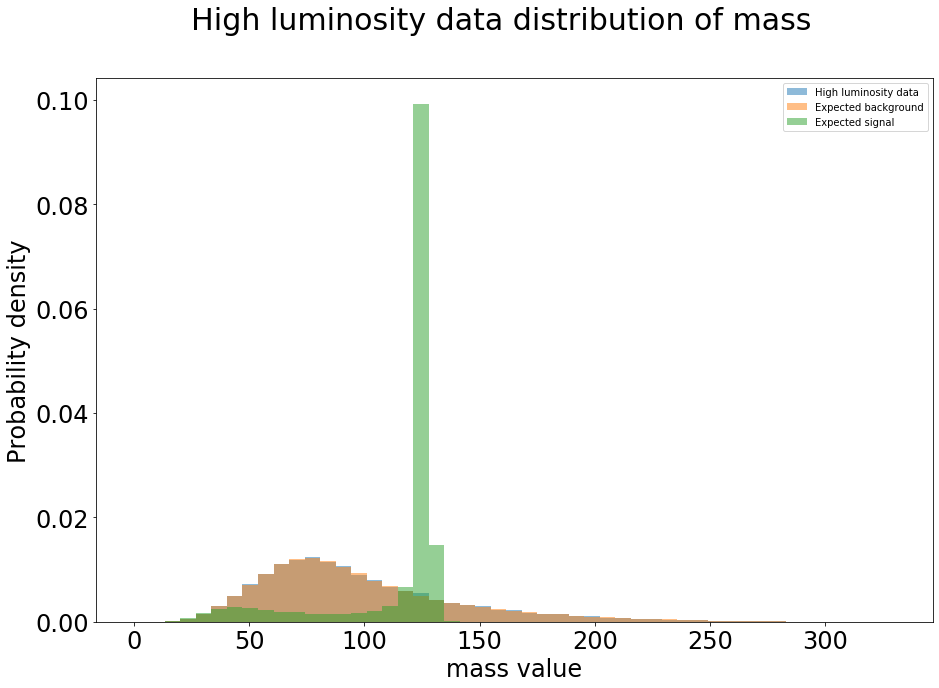

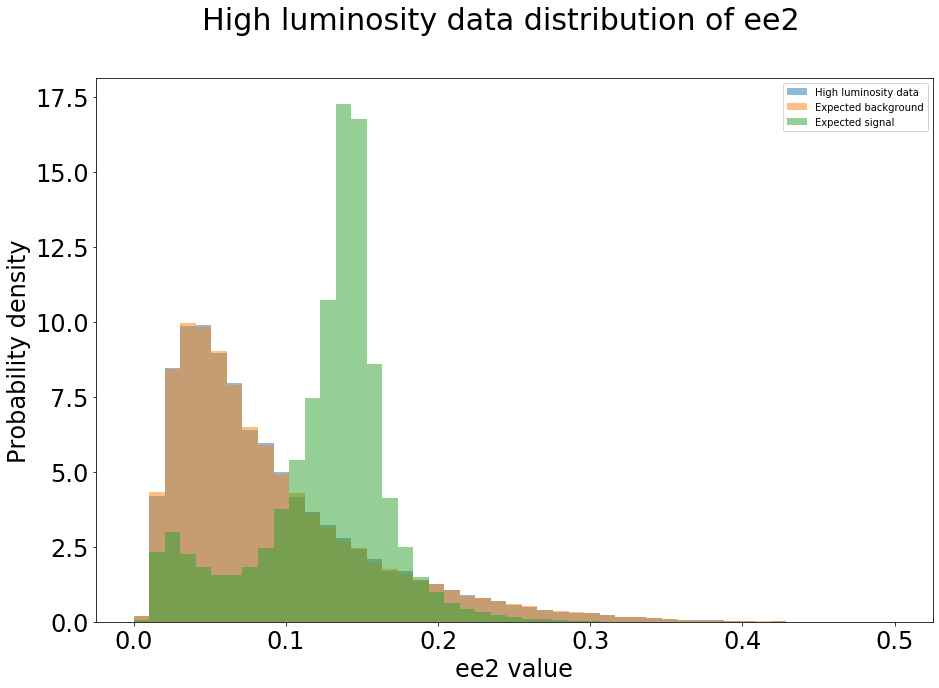

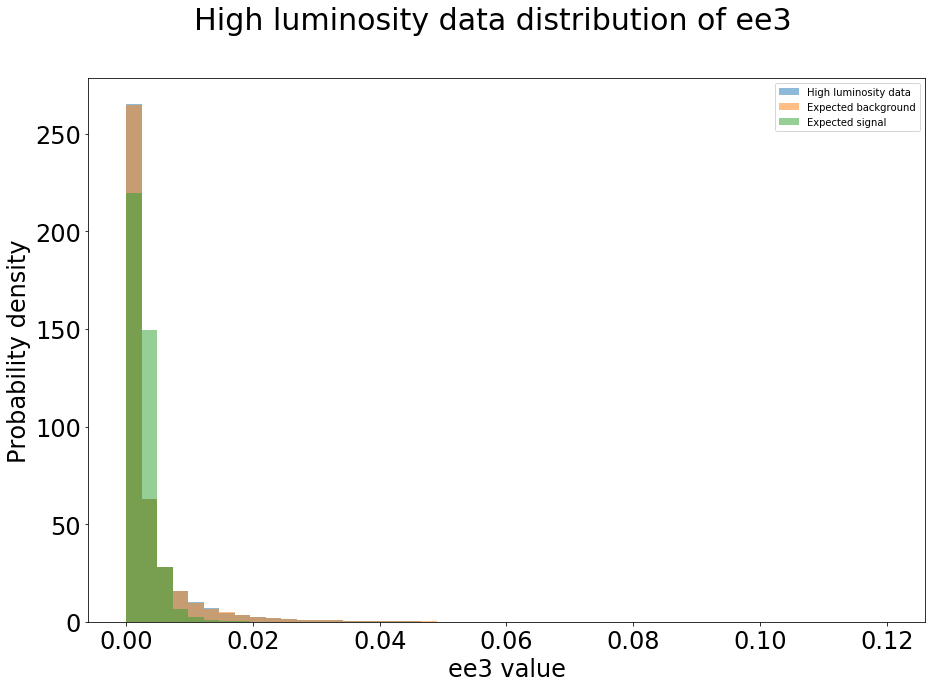

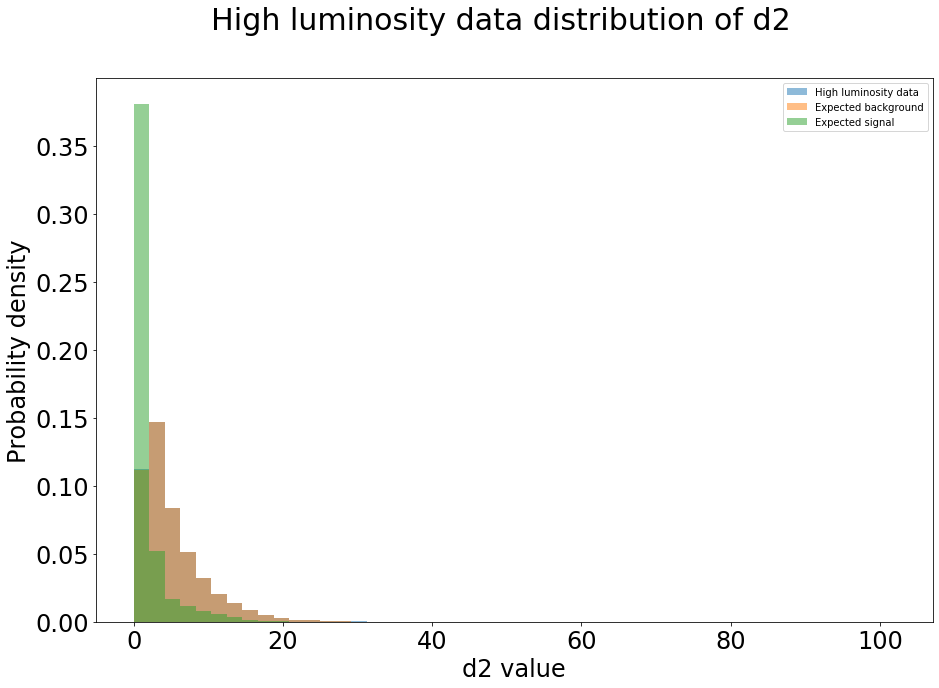

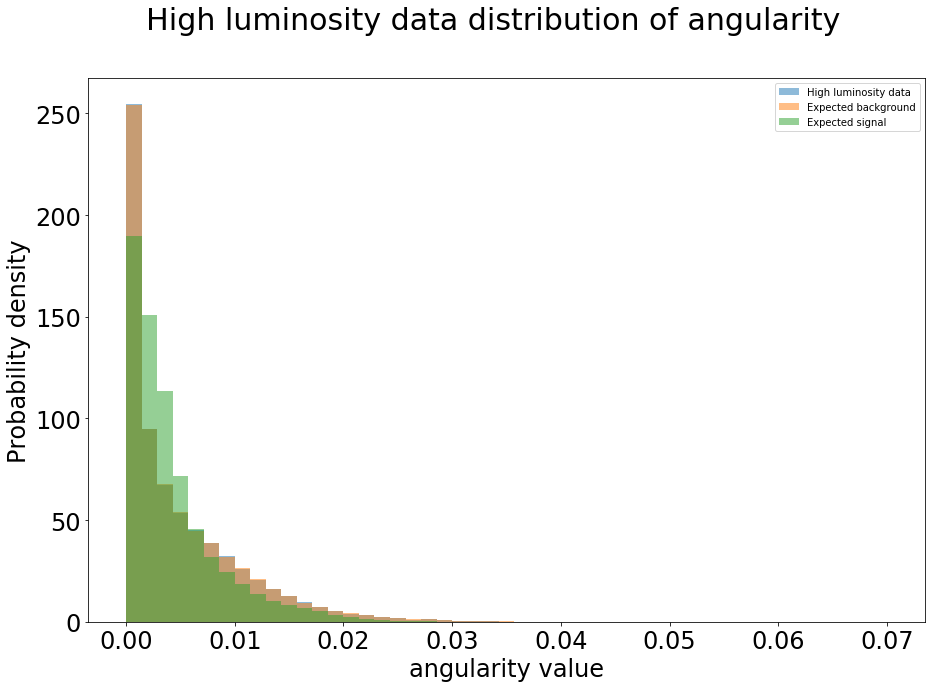

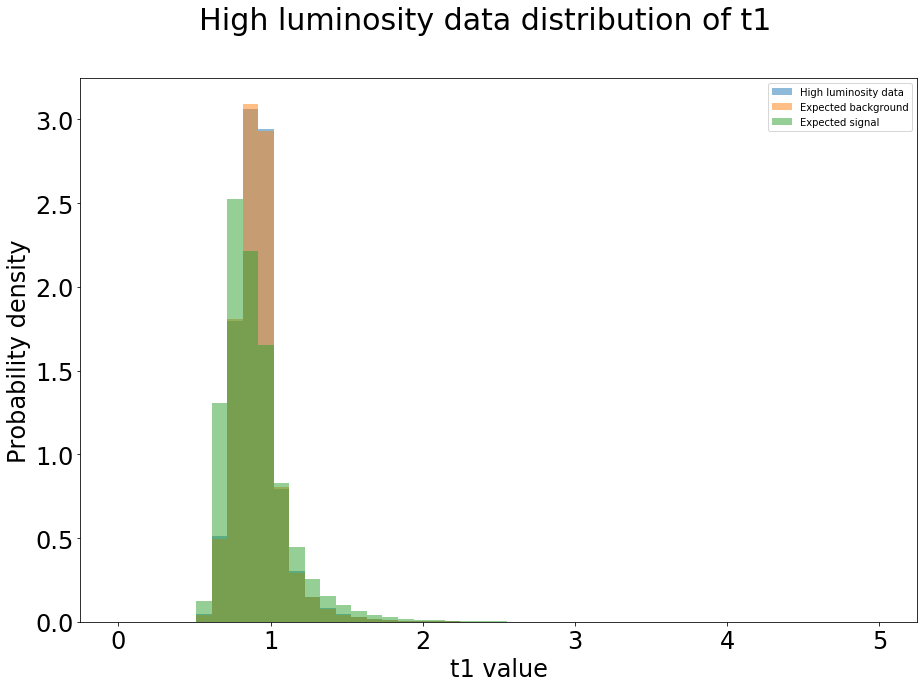

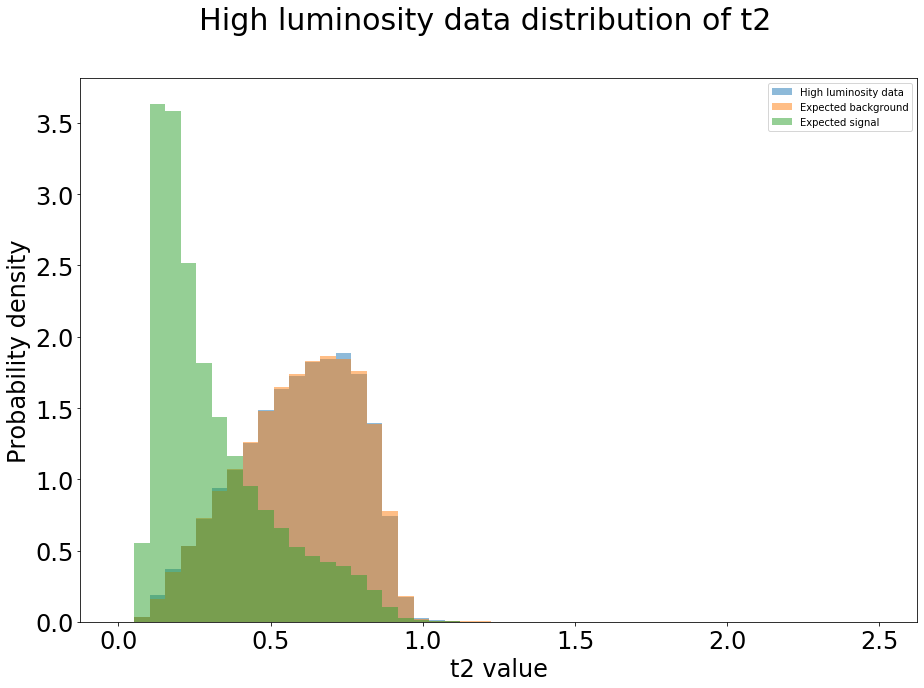

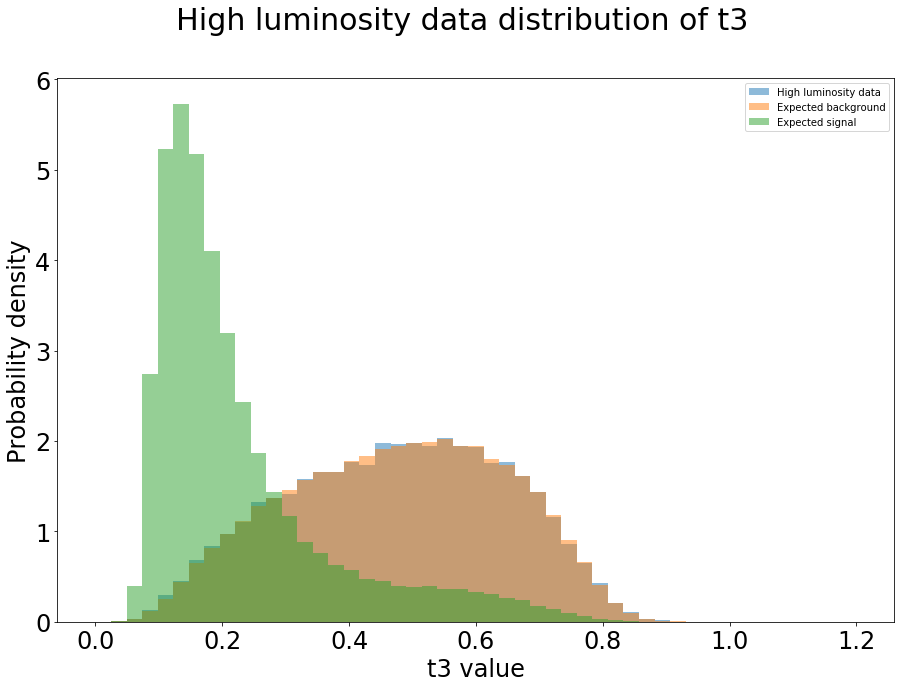

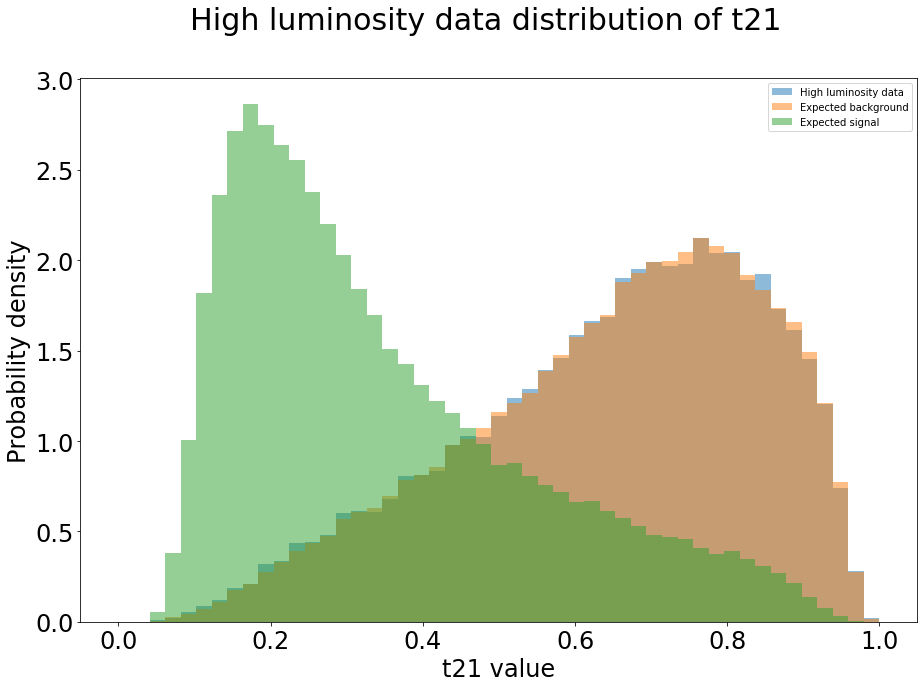

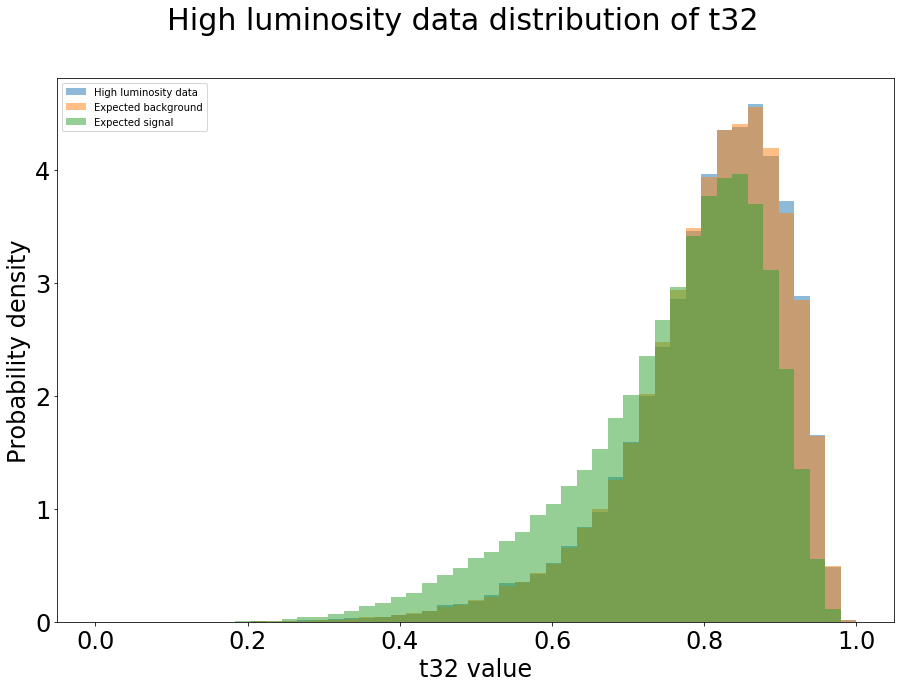

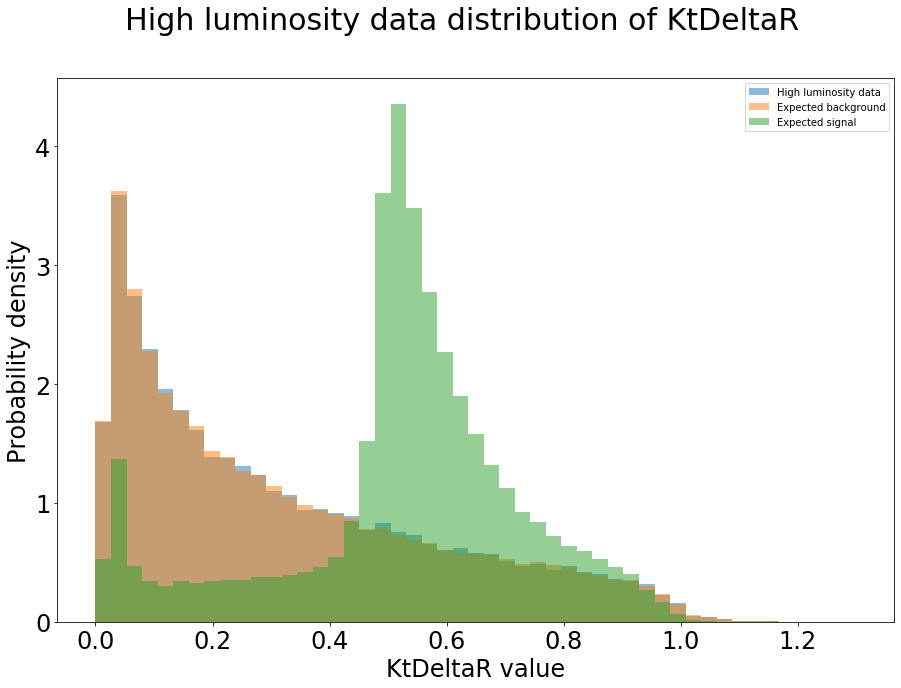

In [354]:
plothighlum('pt', 250, 500)
plothighlum('eta', math.pi * (-1), math.pi)
plothighlum('phi', math.pi * (-1), math.pi)
plothighlum('mass', 0, 330)
plothighlum('ee2', 0, 0.5)
plothighlum('ee3', 0, 0.12)
plothighlum('d2', 0, 102)
plothighlum('angularity', 0, 0.07)
plothighlum('t1', 0, 5)
plothighlum('t2', 0, 2.5)
plothighlum('t3', 0, 1.2)
plothighlum('t21', 0, 1)
plothighlum('t32', 0, 1)
plothighlum('KtDeltaR', 0, 1.3)

Without any selection, the high luminosity data has a distribution almost identical to that of the background for all of the 14 features.

Next, we shall select the data using the criterion we deduced from Lab 07:
<br>By selecting the mass [124,84, 126.7] and d2[0.34, 0.82], we were able to obtain the optimal significance using only two features.

In [356]:
data_high_cut =  data_high[(data_high['mass'] <= 126.7) & (data_high['mass'] >= 124.84) & (data_high['d2'] <= 0.82) & (data_high['d2'] >= 0.34)]

In [357]:
data_qcd_cut = data_qcd[(data_qcd['mass'] <= 126.7) & (data_qcd['mass'] >= 124.84) & (data_qcd['d2'] <= 0.82) & (data_qcd['d2'] >= 0.34)]

In [358]:
data_higgs_cut =  data_higgs[(data_higgs['mass'] <= 126.7) & (data_higgs['mass'] >= 124.84) & (data_higgs['d2'] <= 0.82) & (data_higgs['d2'] >= 0.34)]

We shall plot the cut data back into the features.

In [362]:
def plothighlum_sel(feature, lower, upper):
    title = 'High luminosity data distribution of ' + feature + '\n(With optimal event selection)'
    plotfeature(feature, title, data_high_cut, 'High luminosity data', data_qcd_cut, 'Expected background', data_higgs_cut, 'Expected signal', lower, upper)

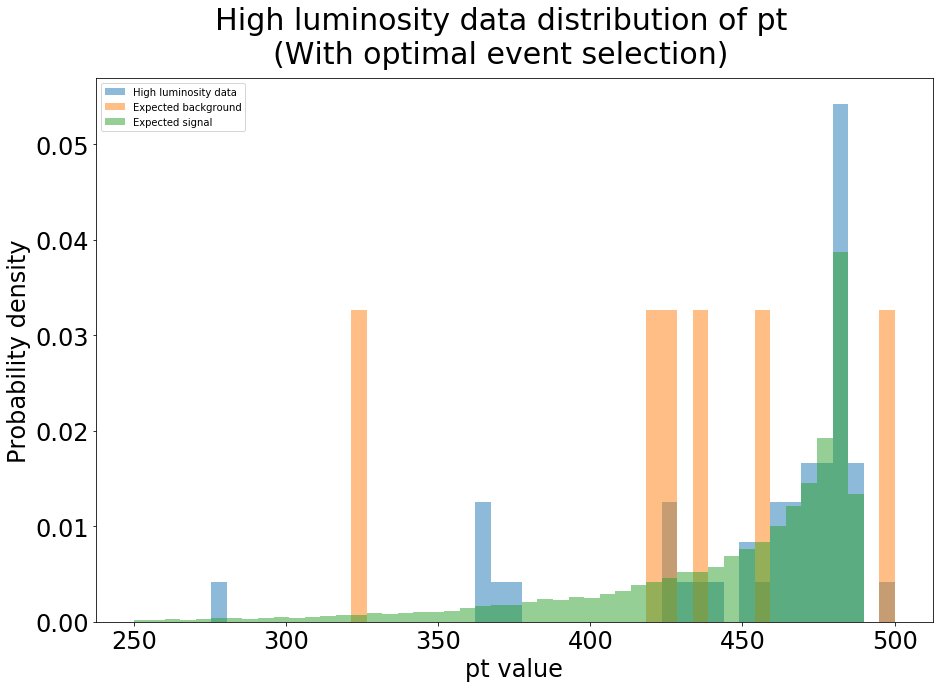

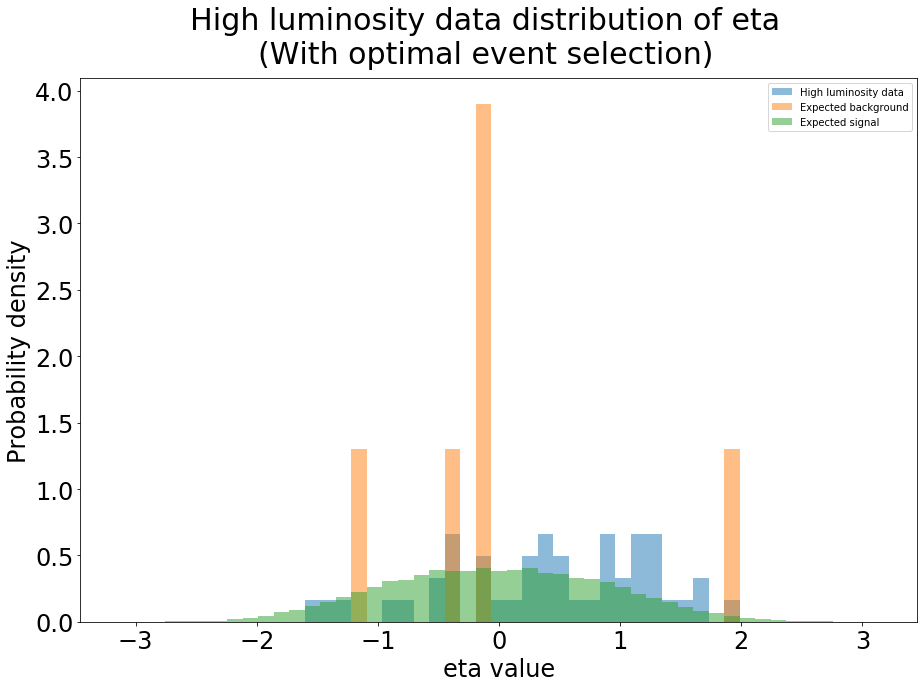

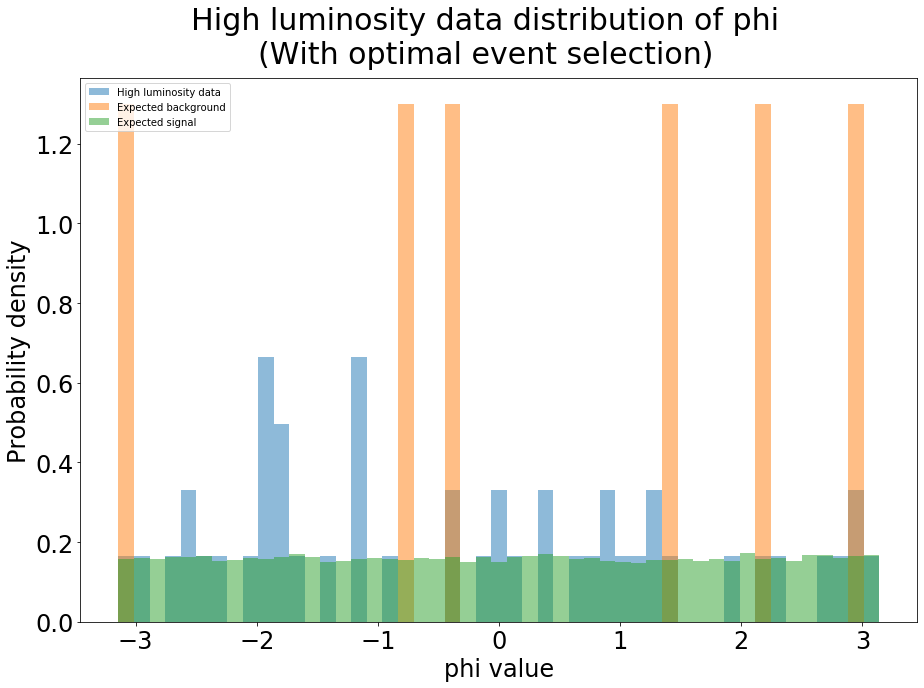

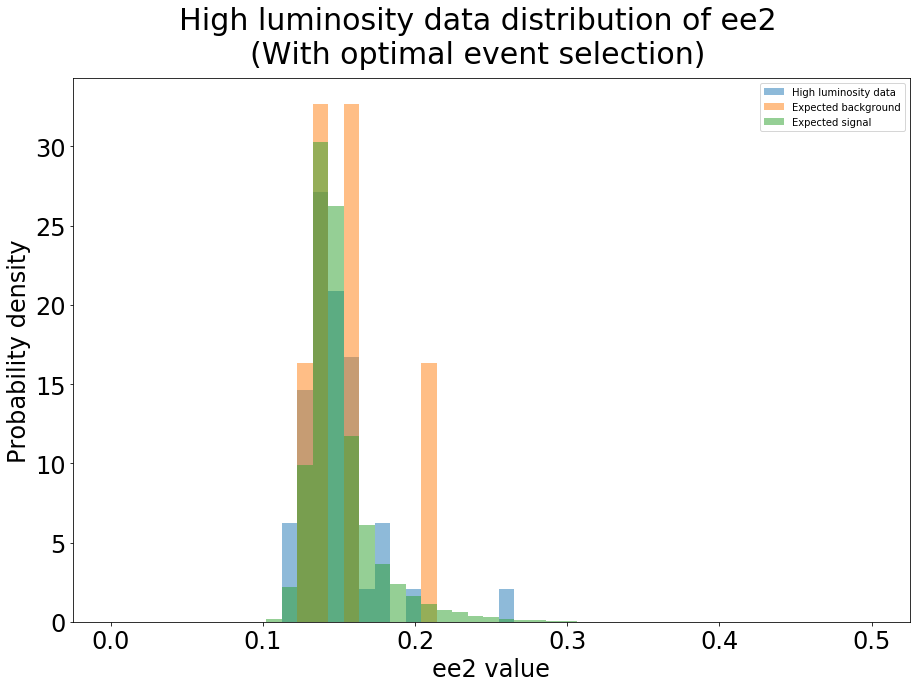

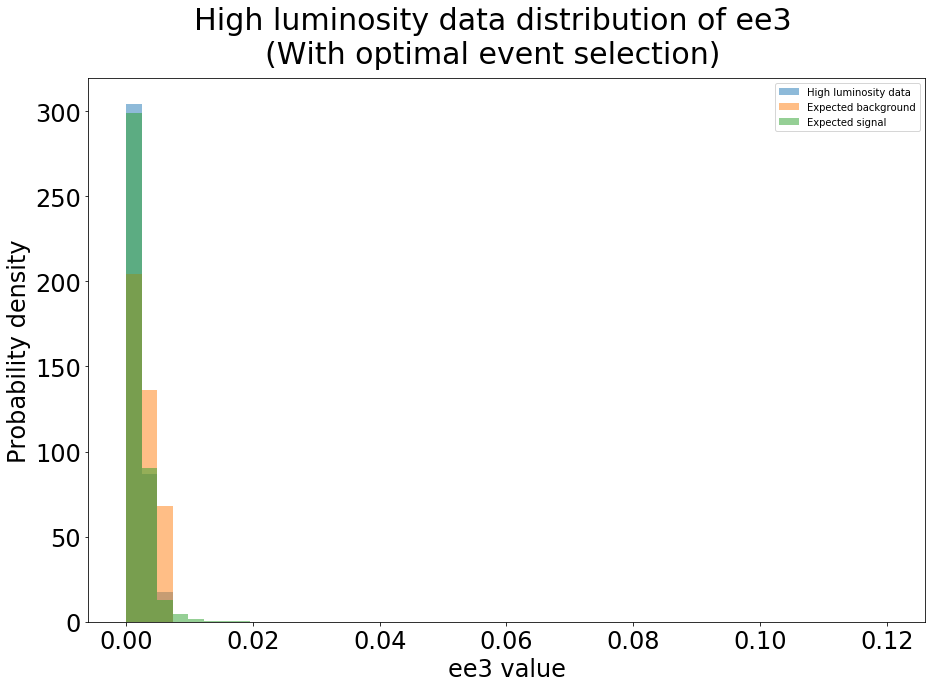

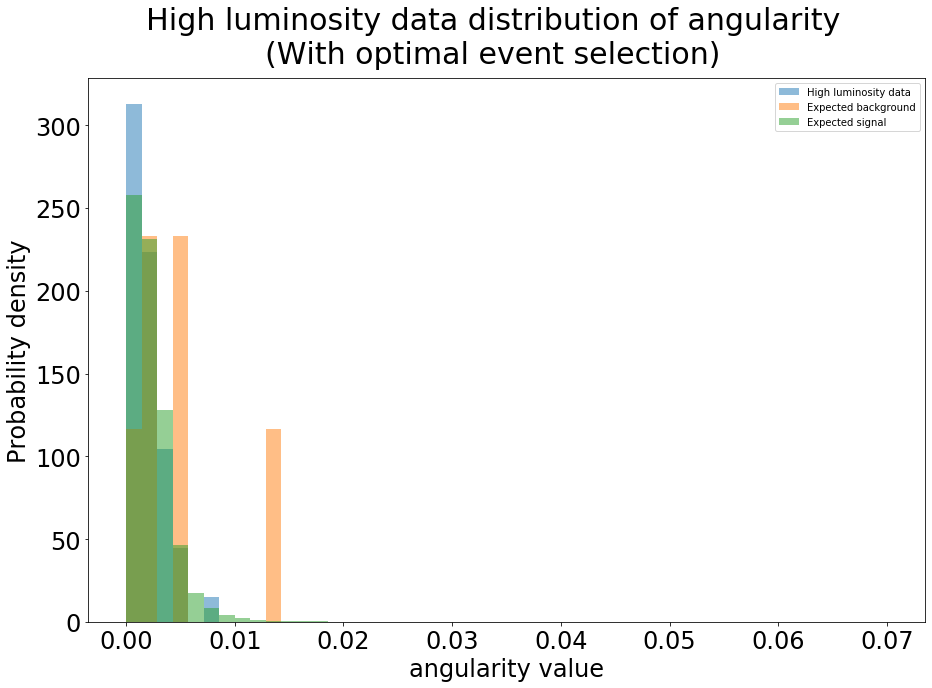

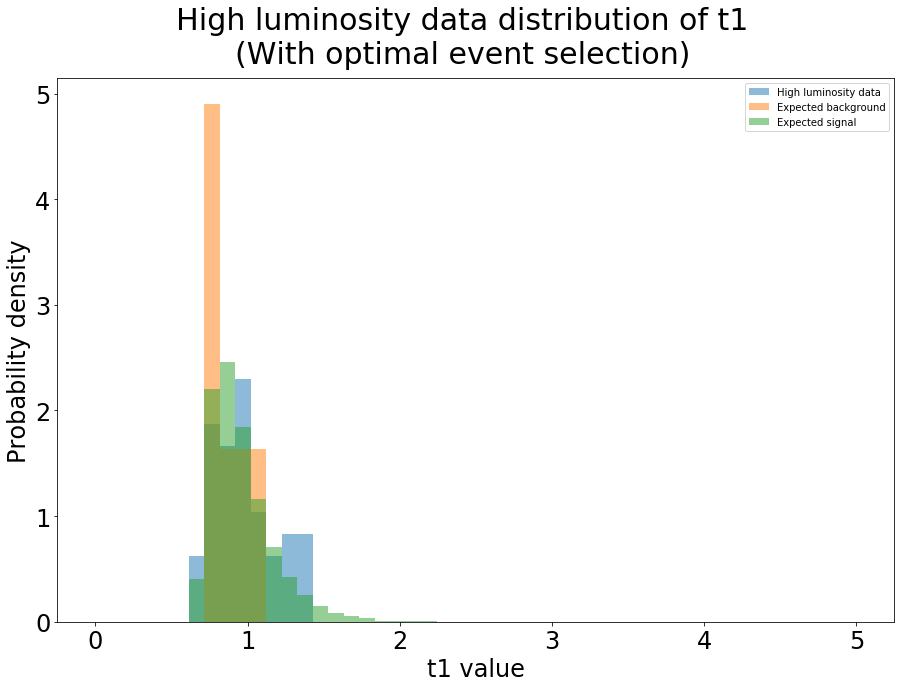

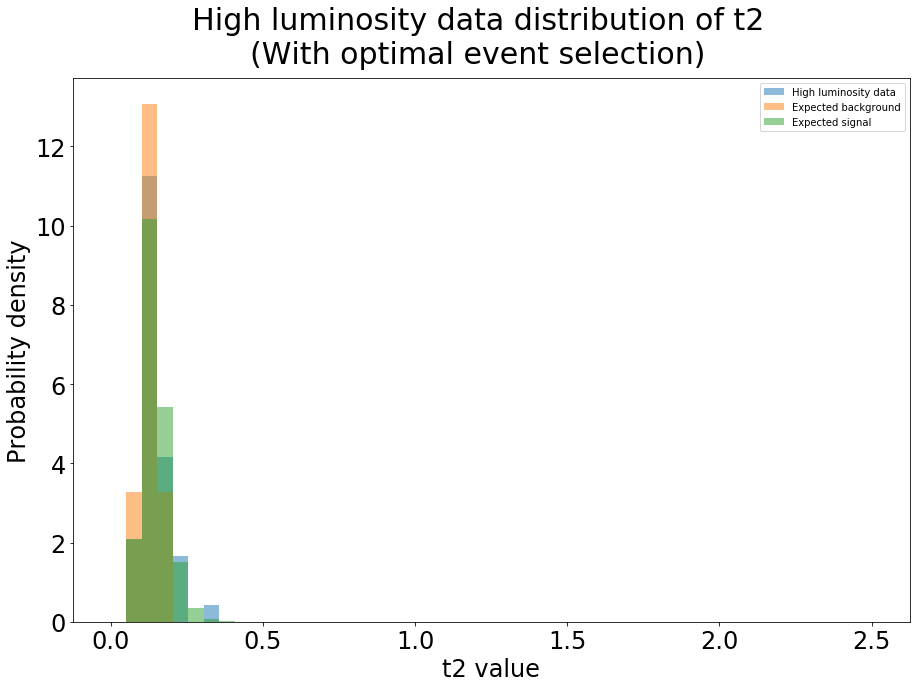

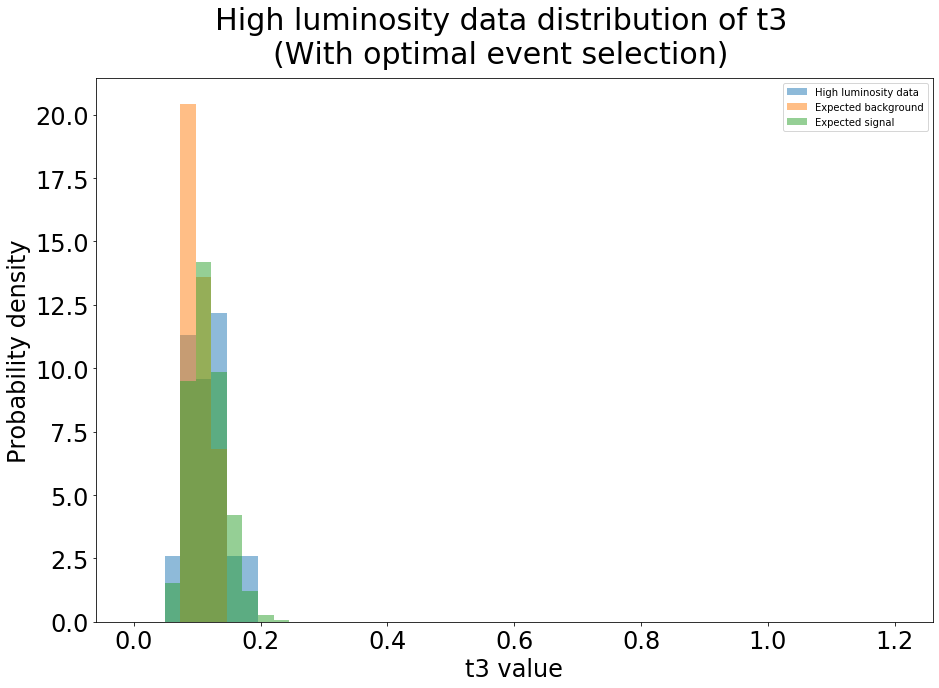

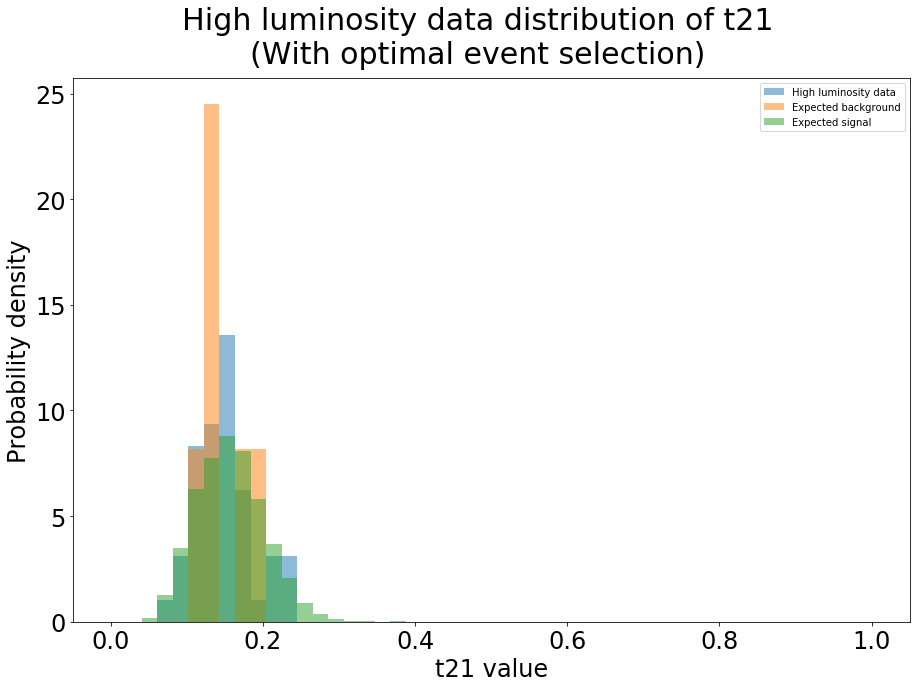

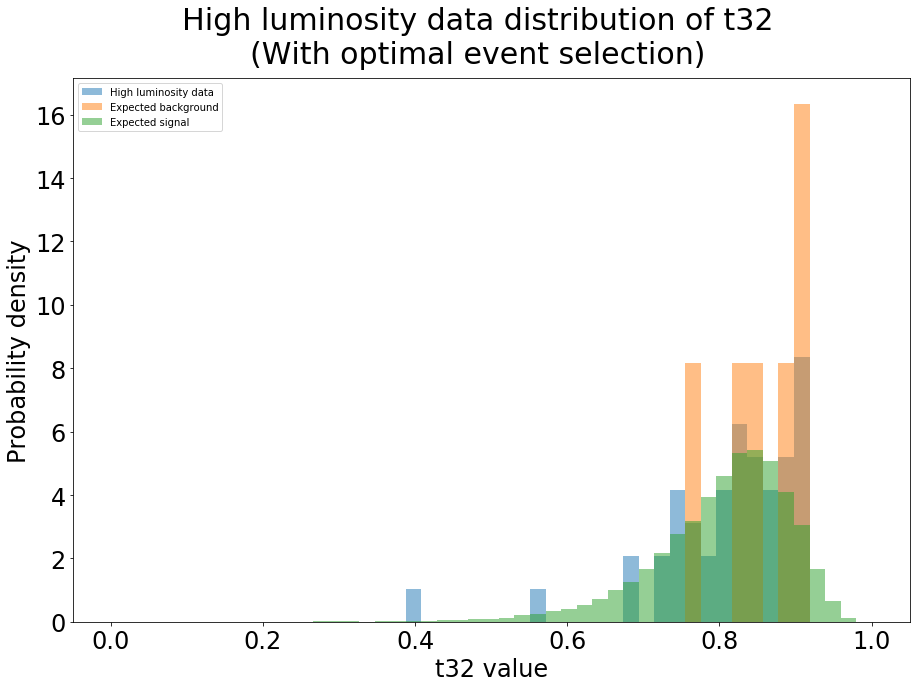

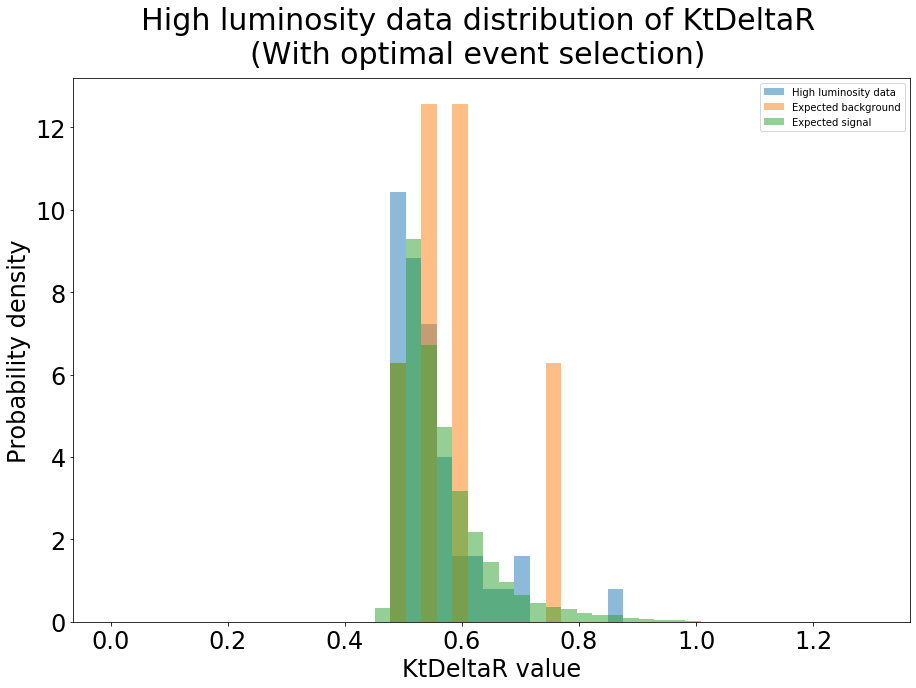

In [363]:
plothighlum_sel('pt', 250, 500)
plothighlum_sel('eta', math.pi * (-1), math.pi)
plothighlum_sel('phi', math.pi * (-1), math.pi)
#plothighlum_sel('mass', 0, 330)
plothighlum_sel('ee2', 0, 0.5)
plothighlum_sel('ee3', 0, 0.12)
#plothighlum_sel('d2', 0, 102)
plothighlum_sel('angularity', 0, 0.07)
plothighlum_sel('t1', 0, 5)
plothighlum_sel('t2', 0, 2.5)
plothighlum_sel('t3', 0, 1.2)
plothighlum_sel('t21', 0, 1)
plothighlum_sel('t32', 0, 1)
plothighlum_sel('KtDeltaR', 0, 1.3)

While not identical, the high luminosity data histogram after selection looks more similar to the expected signal histogram.

We've got our cuts, so we will compute the respective significance of the original expectation and the current observation.

In [364]:
n_bg = len(data_qcd_cut)/len(data_qcd) * 20000
n_sg = len(data_higgs_cut)/len(data_higgs) * 100

In [365]:
value = stats.poisson.sf(n_sg + n_bg, mu = n_bg, loc=0)
expected_sigma = stats.norm.isf(value, 0, 1)
expected_sigma

8.573186208549798

From our original expectation, the cut will allow the signal to have a significance around 8.57$\sigma$.

In [367]:
n_bg = len(data_qcd_cut)/len(data_qcd) * len(data_high)
n_sg = len(data_high_cut)

In [267]:
value = stats.poisson.sf(n_sg + n_bg, mu = n_bg, loc=0)
observed_sigma_high = stats.norm.isf(value, 0, 1)
observed_sigma_high

14.356898418332591

This is an even higher significance than what we expected!
We expected 100 signal events out of every 20000 background events, so the high luminosity data must have an greater probability of signal data versus background data.

# 2 Low luminosity data

Similarly, we will use a similar function to plot the low luminosity data.

In [369]:
def plotlowlum(feature, lower, upper):
    title = 'Low luminosity data distribution of ' + feature
    plotfeature(feature, title, data_low, 'Low luminosity data', data_qcd, 'Expected background', data_higgs, 'Expected signal', lower, upper)

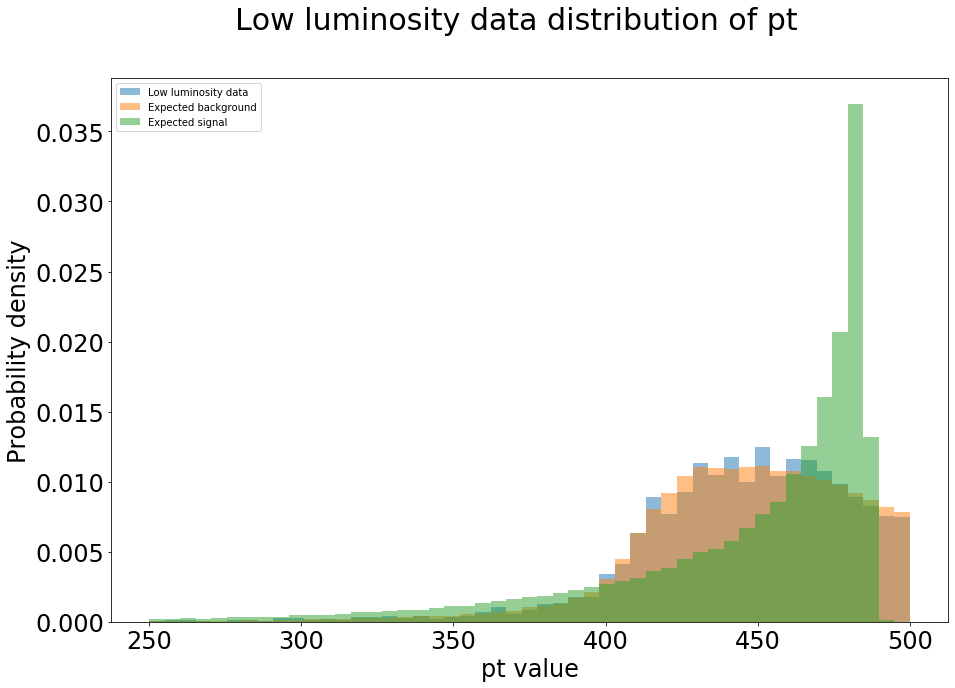

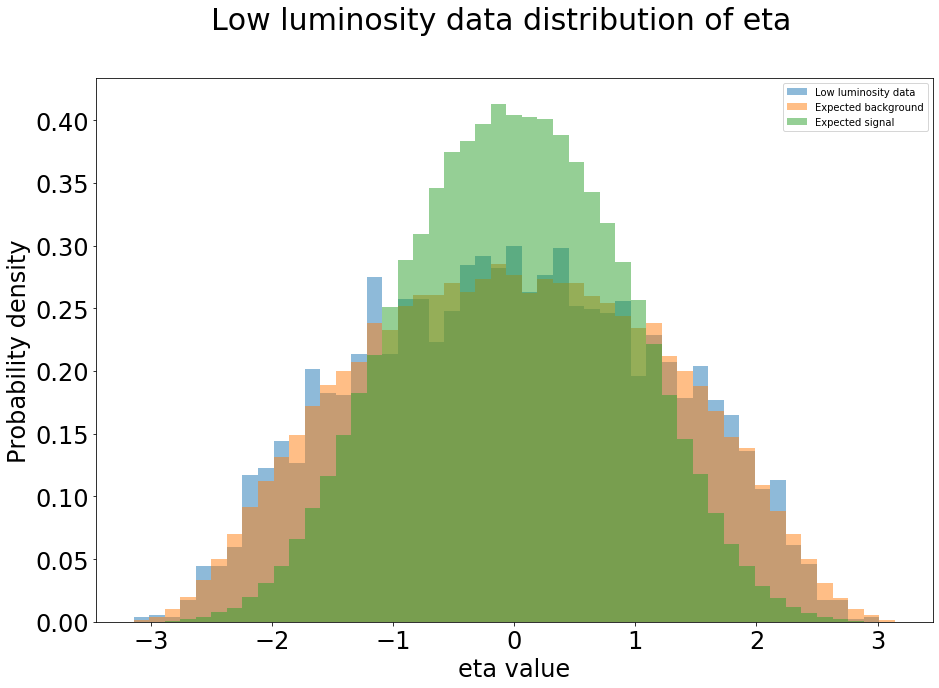

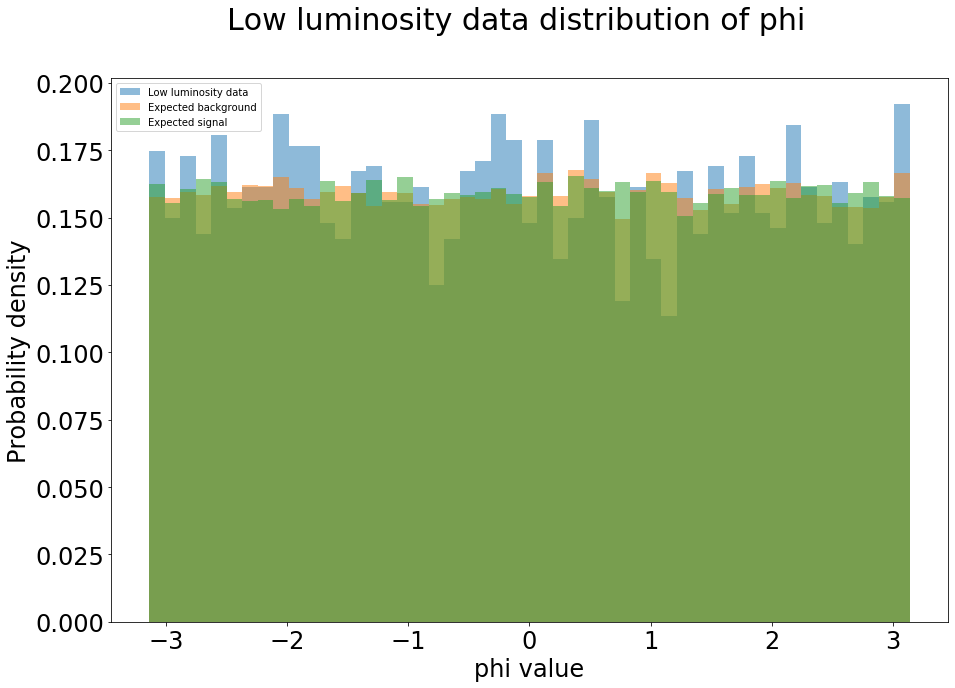

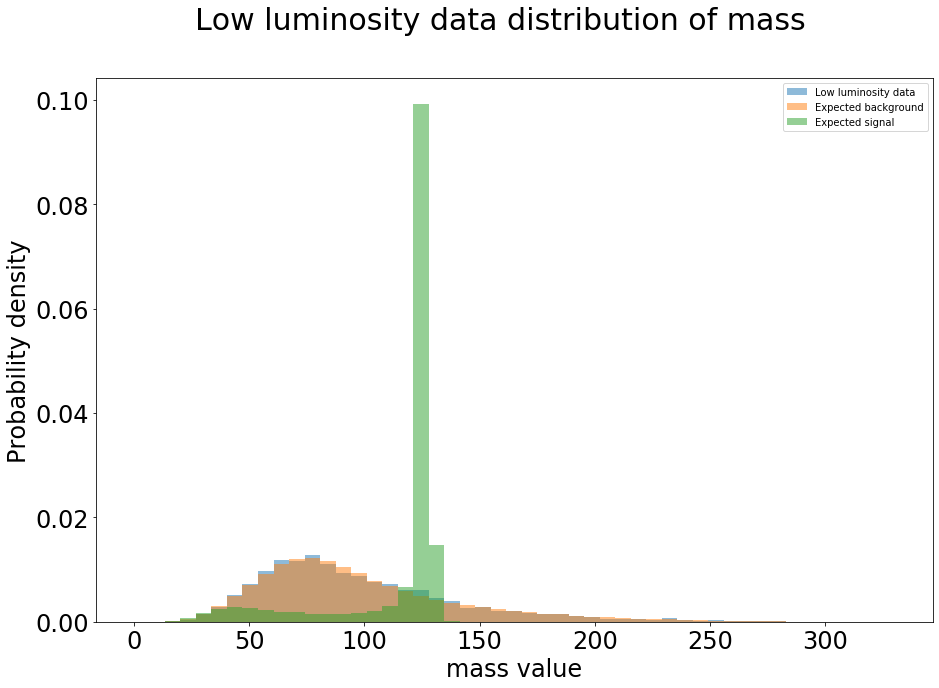

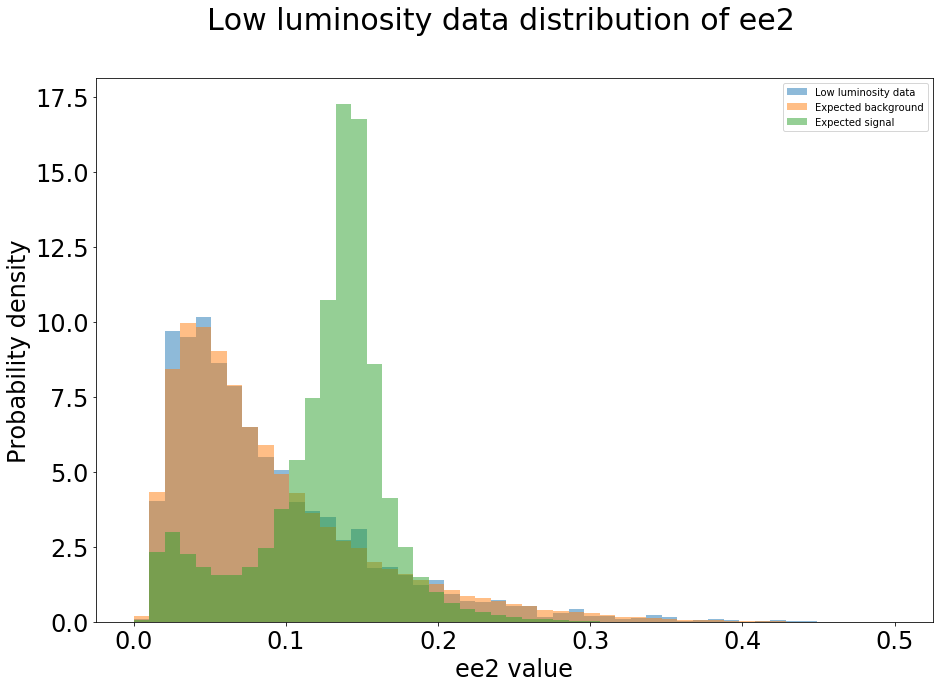

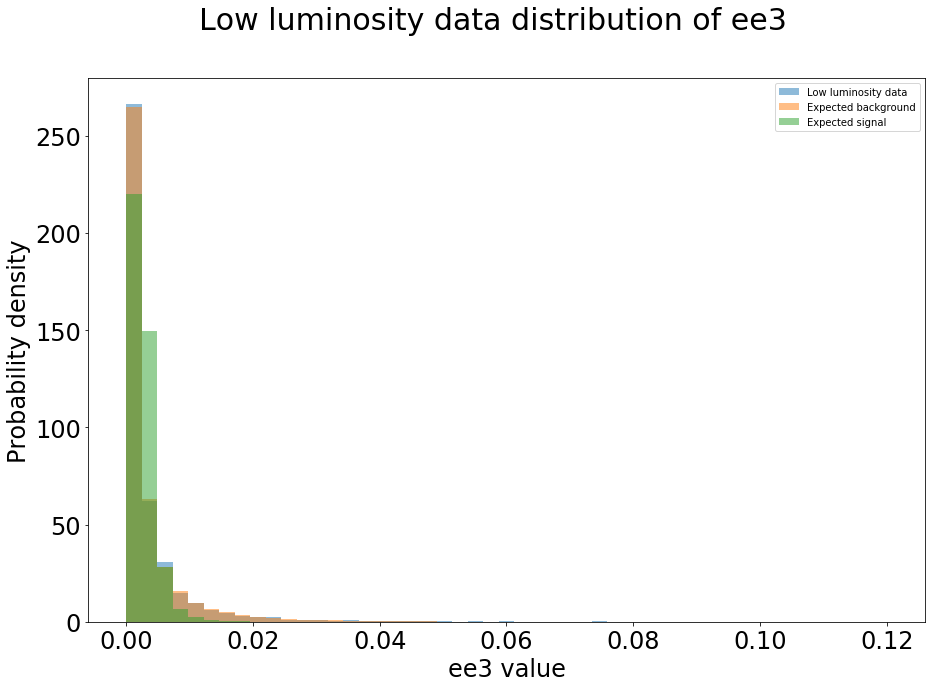

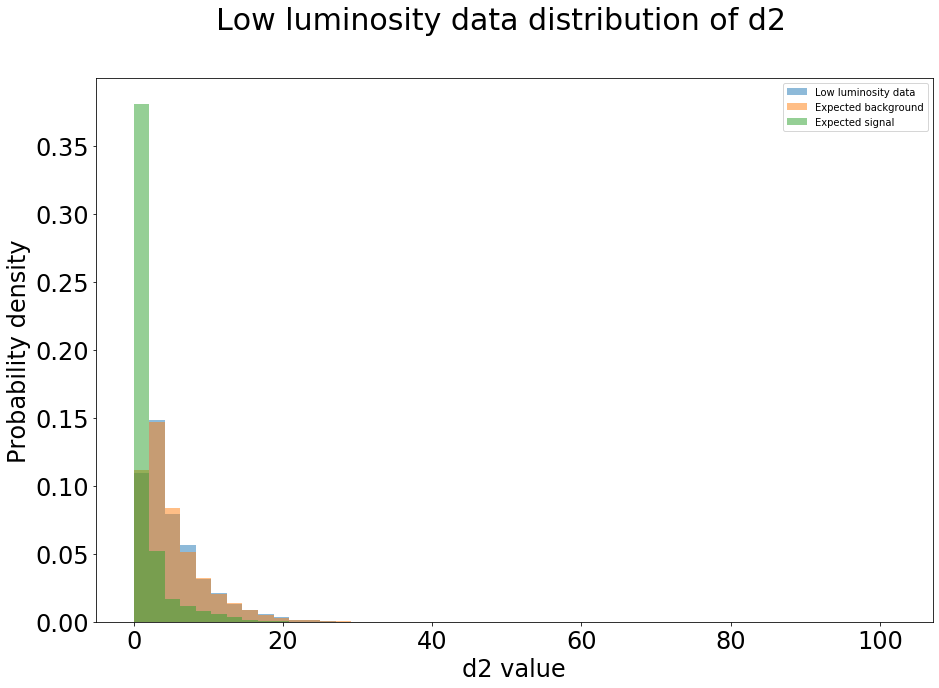

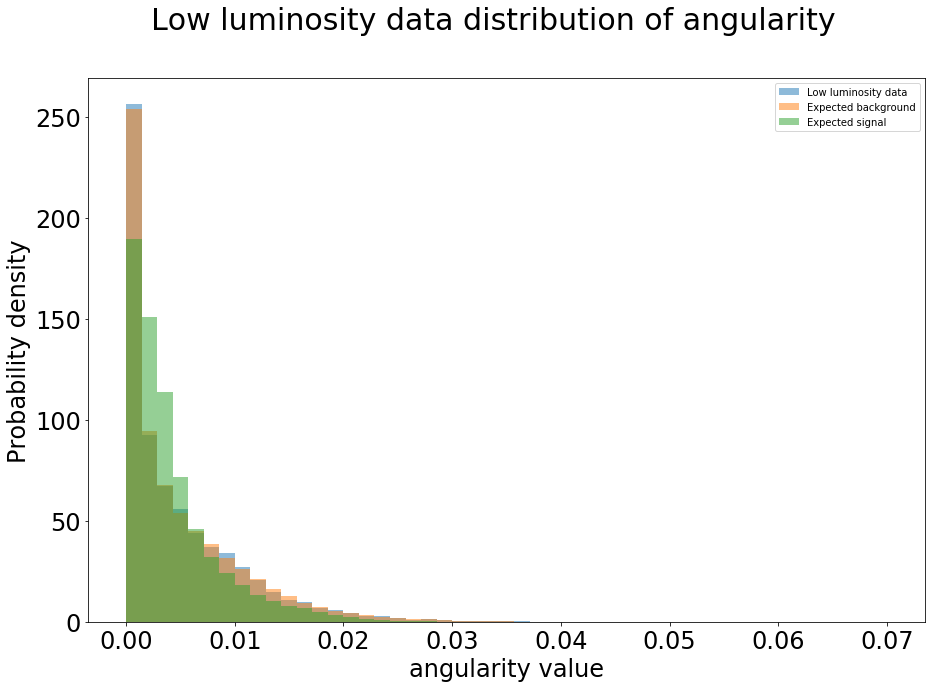

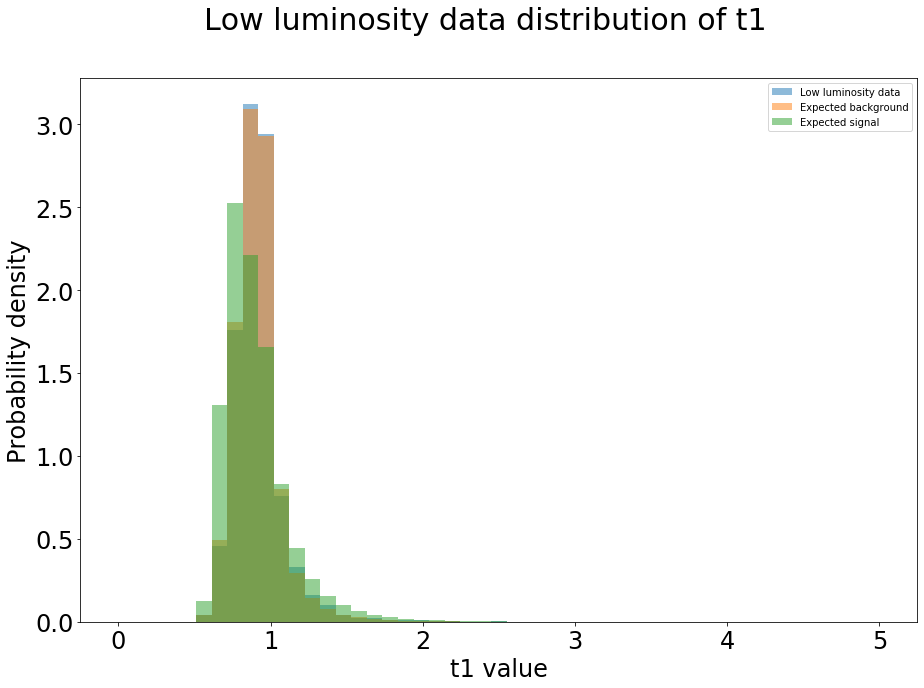

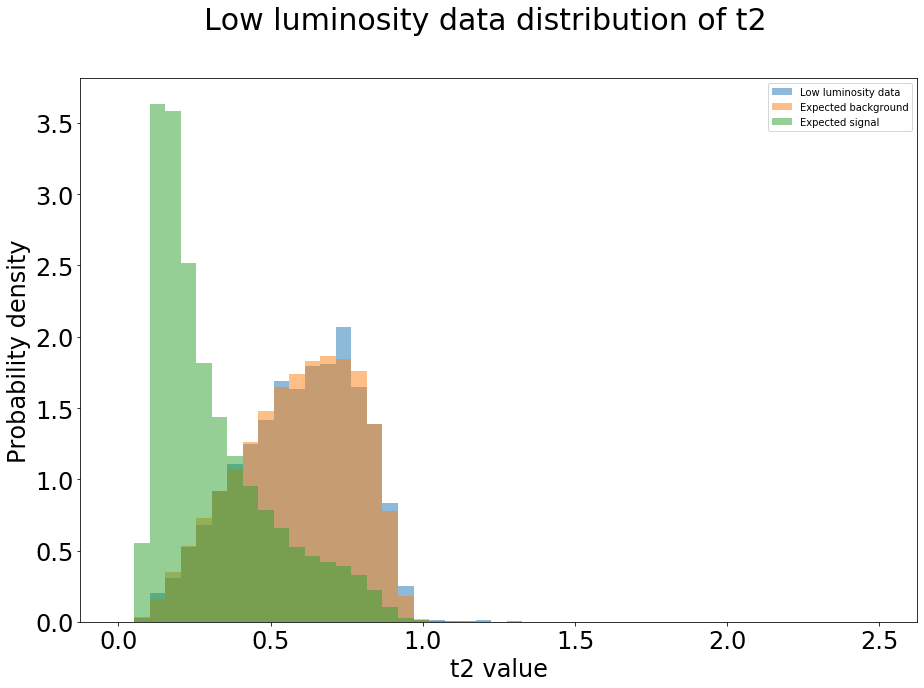

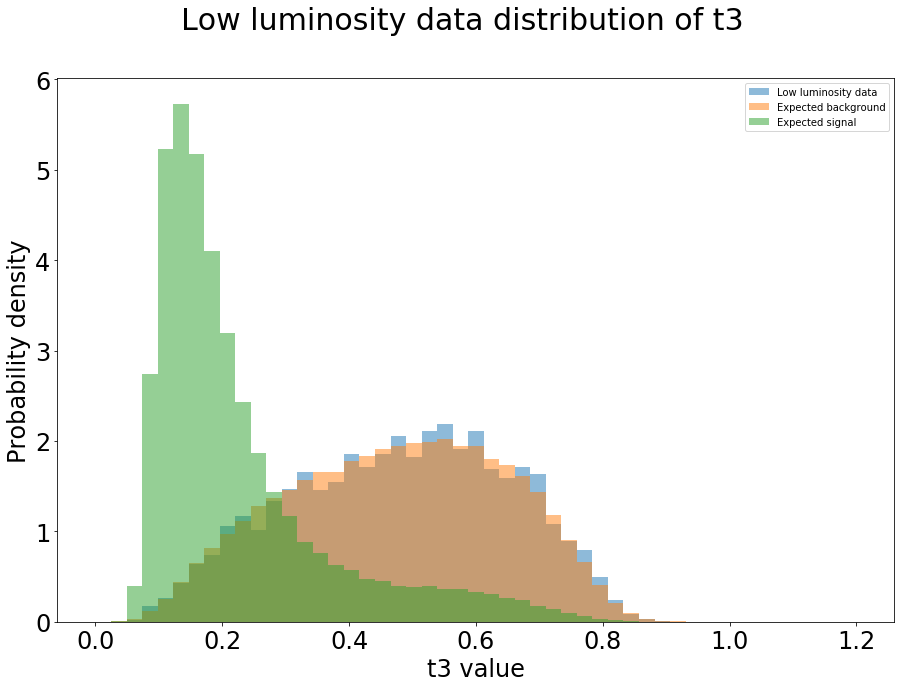

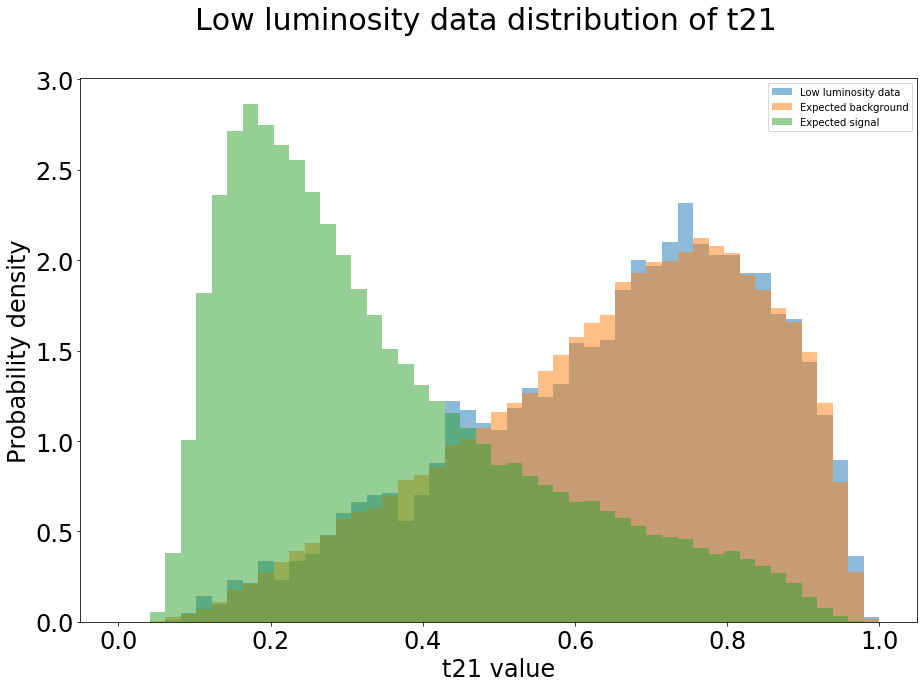

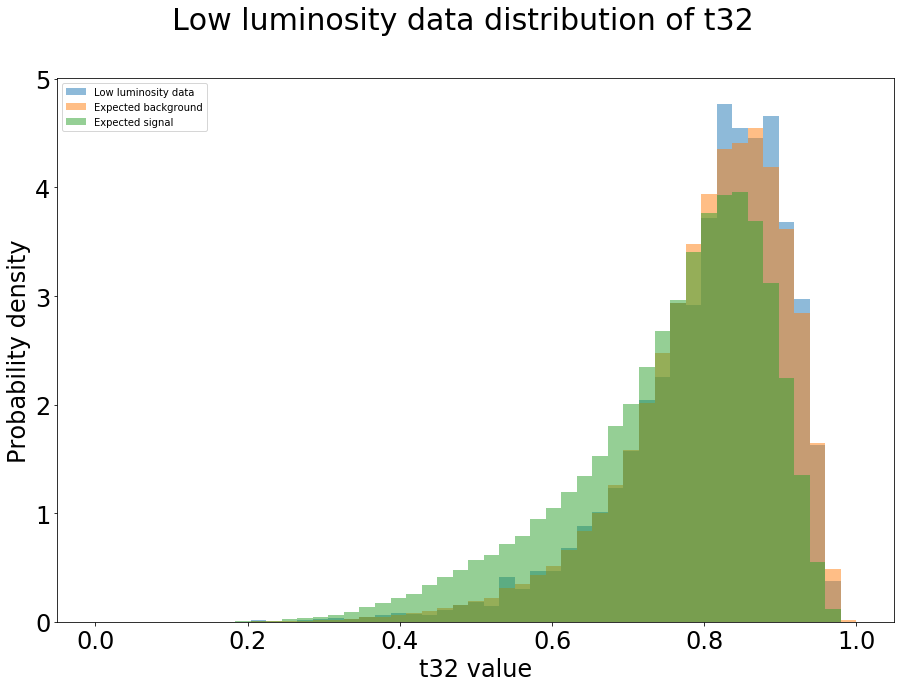

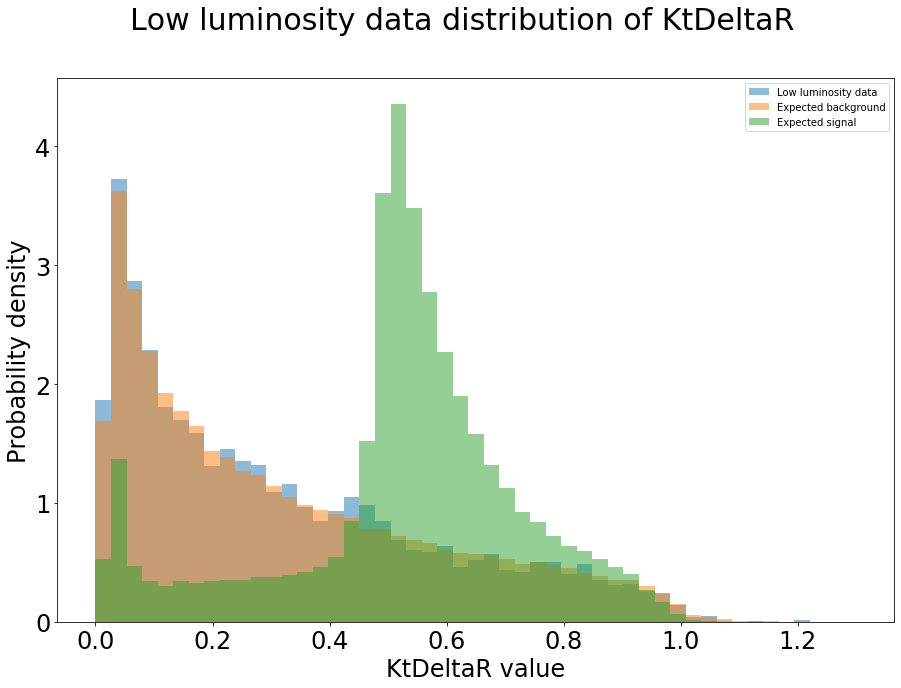

In [370]:
plotlowlum('pt', 250, 500)
plotlowlum('eta', math.pi * (-1), math.pi)
plotlowlum('phi', math.pi * (-1), math.pi)
plotlowlum('mass', 0, 330)
plotlowlum('ee2', 0, 0.5)
plotlowlum('ee3', 0, 0.12)
plotlowlum('d2', 0, 102)
plotlowlum('angularity', 0, 0.07)
plotlowlum('t1', 0, 5)
plotlowlum('t2', 0, 2.5)
plotlowlum('t3', 0, 1.2)
plotlowlum('t21', 0, 1)
plotlowlum('t32', 0, 1)
plotlowlum('KtDeltaR', 0, 1.3)

It appears that the low luminosity data is slighly different in distribution from the expected background for some features, but the general shapes are still similar.

Next, we apply the optimization.

In [373]:
data_low_cut =  data_low[(data_low['mass'] <= 126.7) & (data_low['mass'] >= 124.84) & (data_low['d2'] <= 0.82) & (data_low['d2'] >= 0.34)]

In [372]:
def plotlowlum_sel(feature, lower, upper):
    title = 'Low luminosity data distribution of ' + feature + '\n(With optimal event selection)'
    plotfeature(feature, title, data_low_cut, 'Low luminosity data', data_qcd_cut, 'Expected background', data_higgs_cut, 'Expected signal', lower, upper)

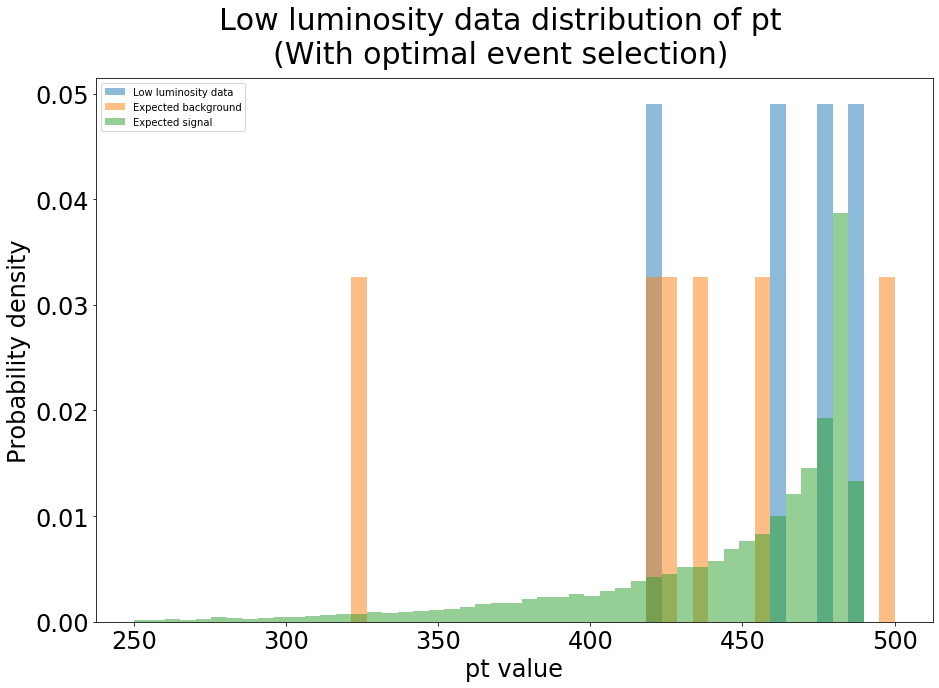

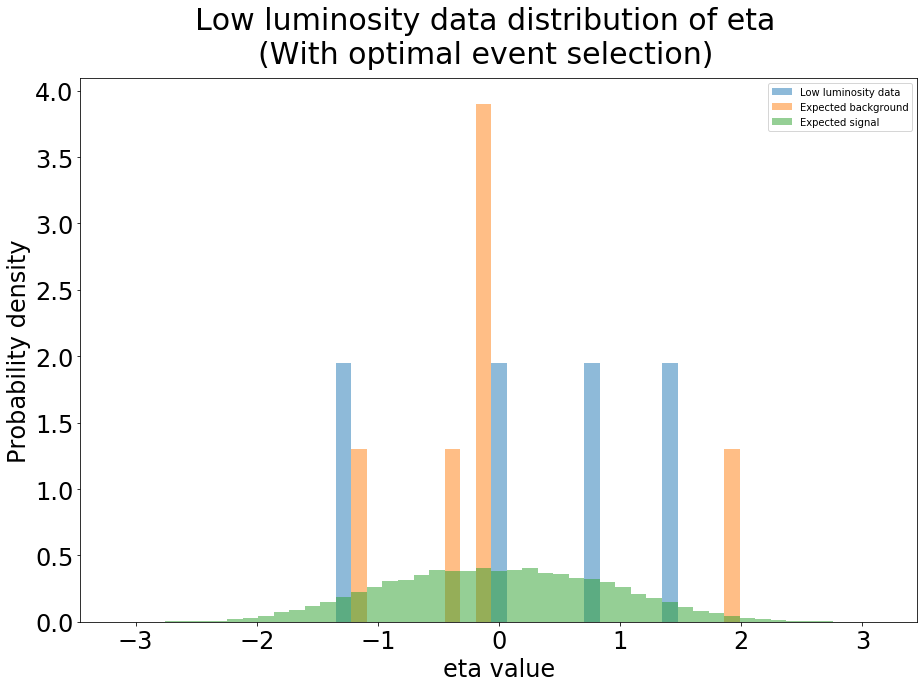

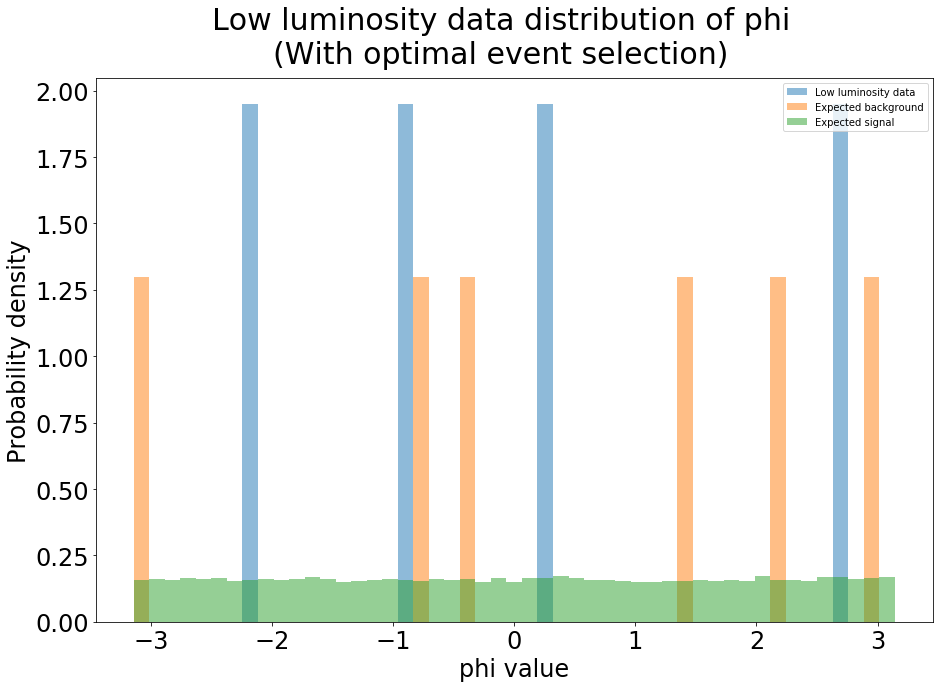

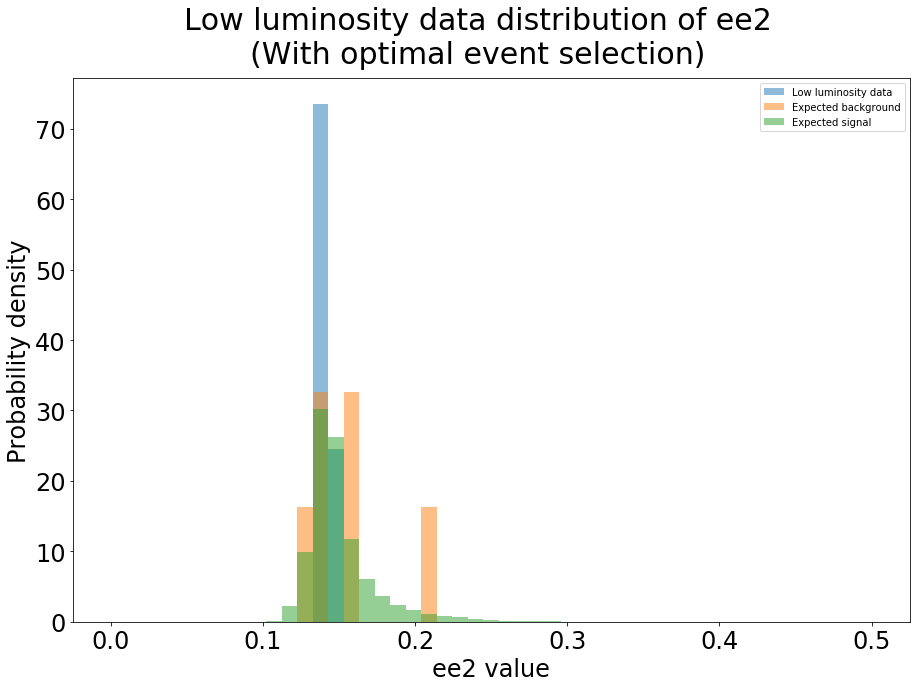

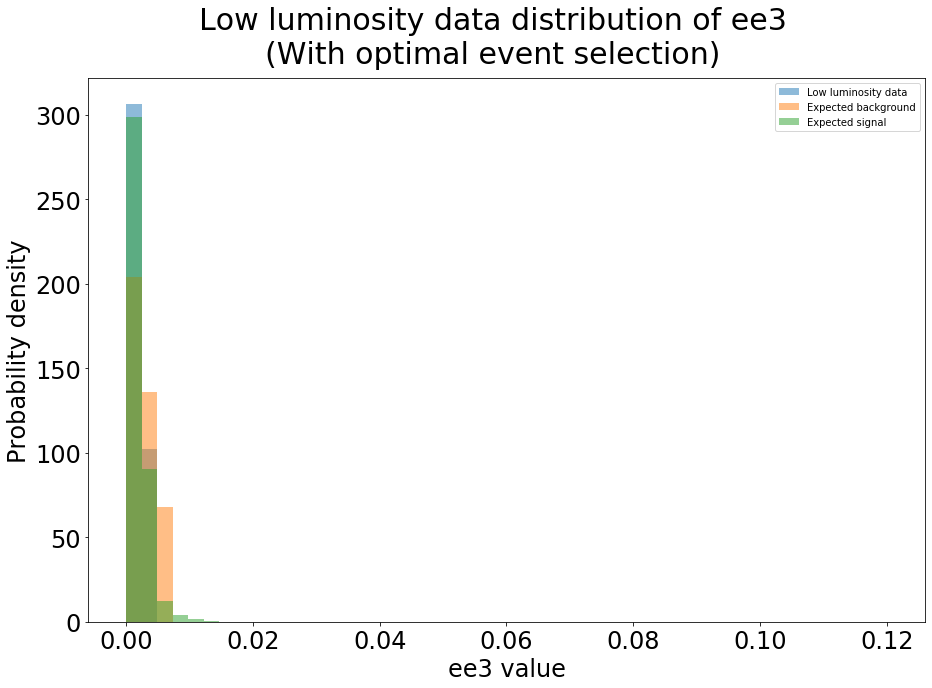

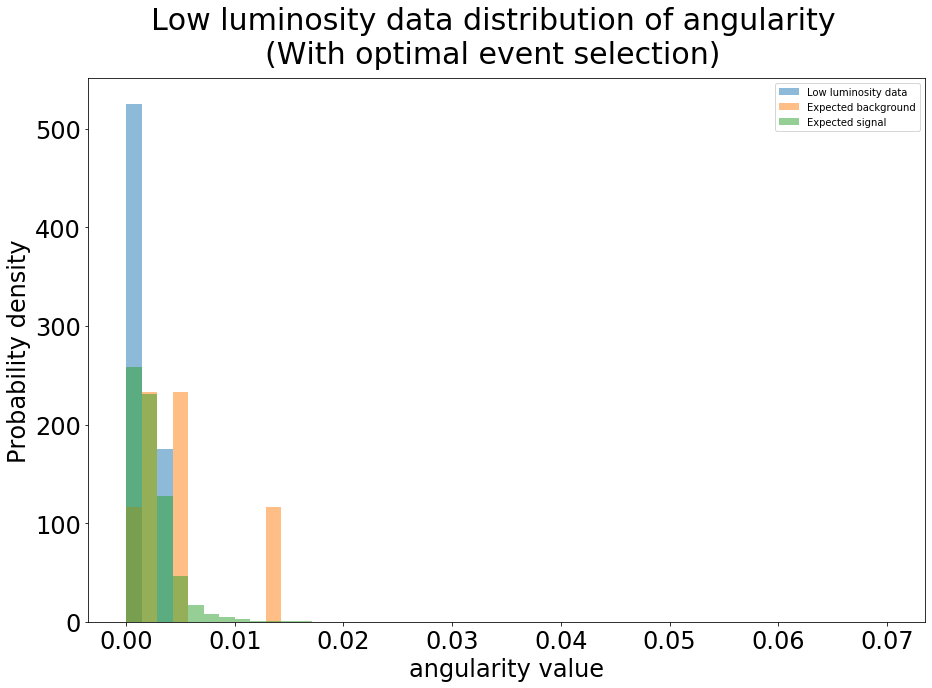

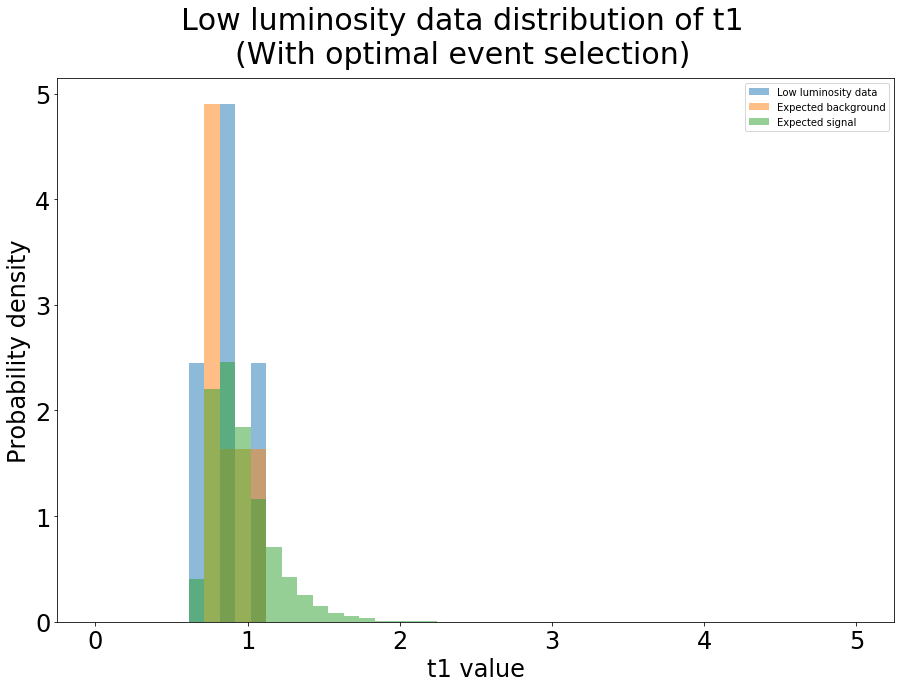

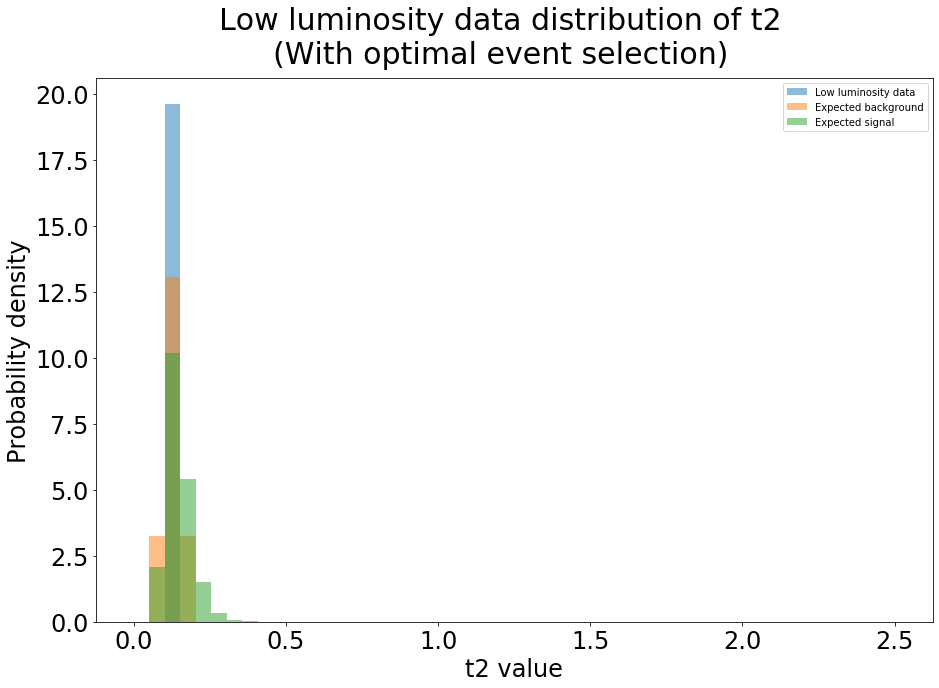

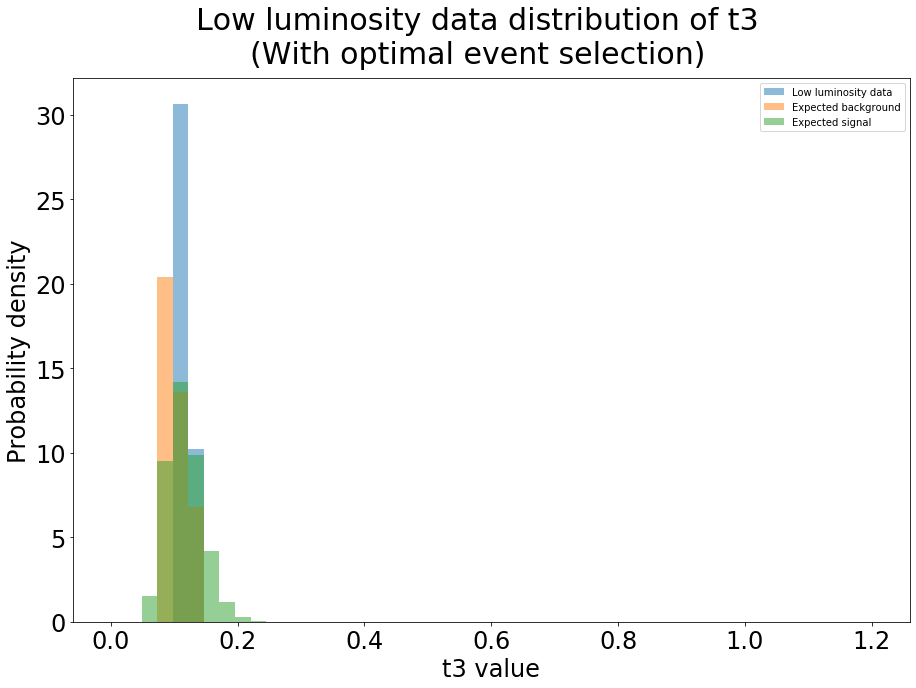

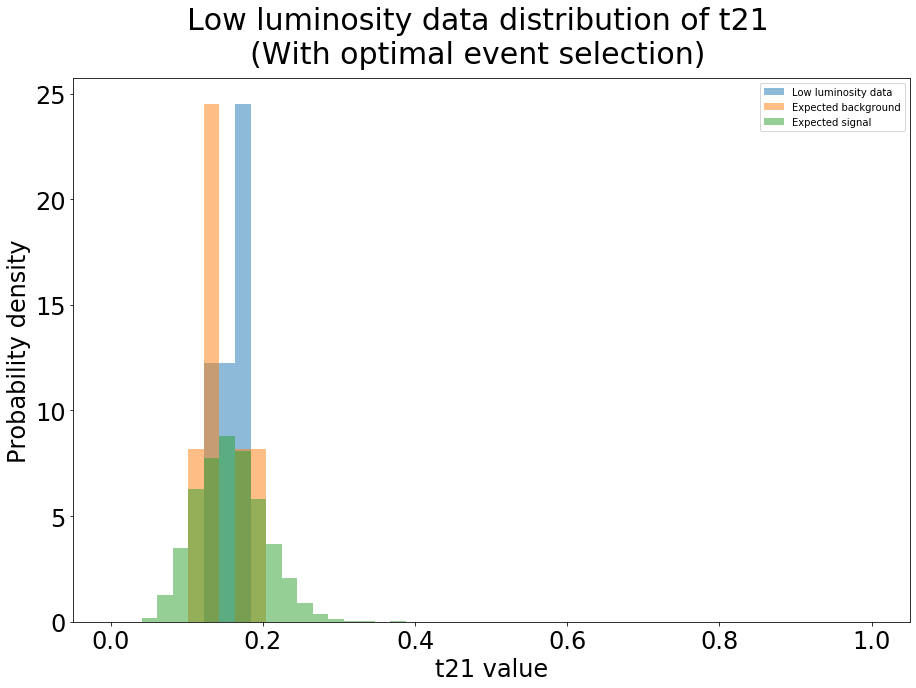

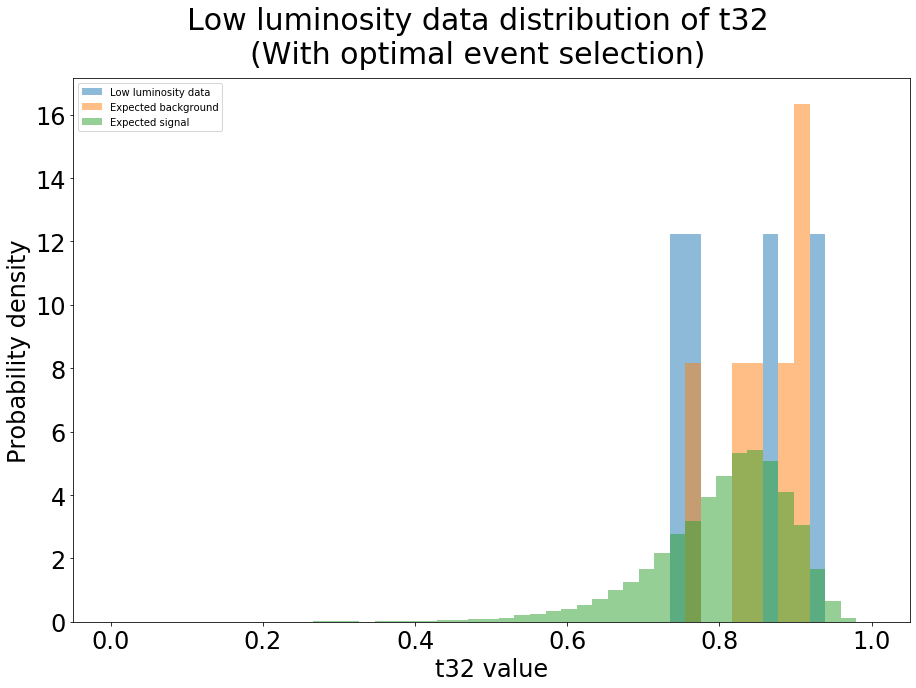

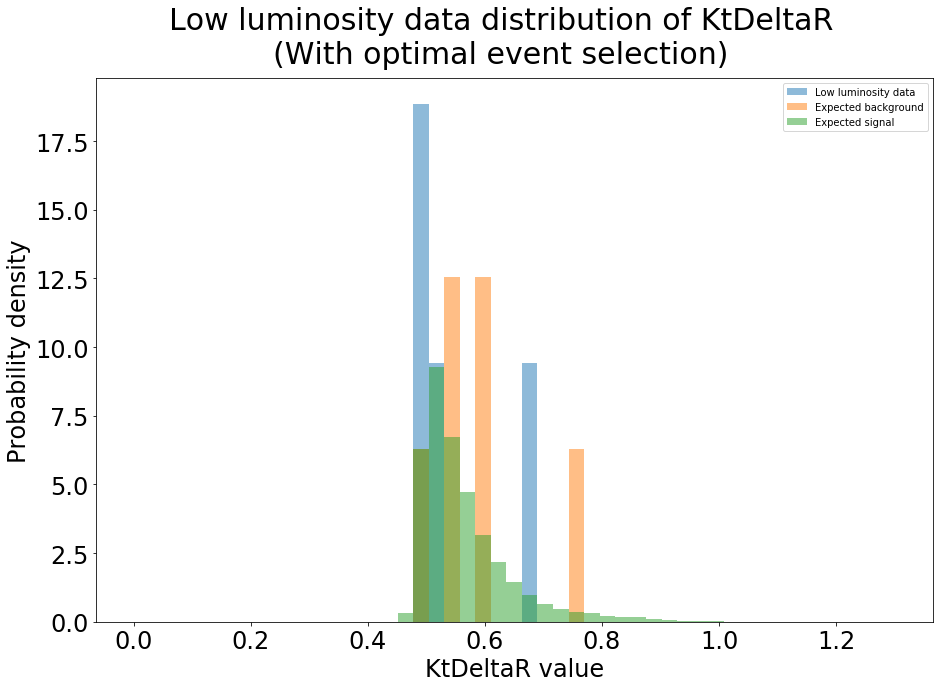

In [375]:
plotlowlum_sel('pt', 250, 500)
plotlowlum_sel('eta', math.pi * (-1), math.pi)
plotlowlum_sel('phi', math.pi * (-1), math.pi)
#plotlowlum_sel('mass', 0, 330)
plotlowlum_sel('ee2', 0, 0.5)
plotlowlum_sel('ee3', 0, 0.12)
#plotlowlum_sel('d2', 0, 102)
plotlowlum_sel('angularity', 0, 0.07)
plotlowlum_sel('t1', 0, 5)
plotlowlum_sel('t2', 0, 2.5)
plotlowlum_sel('t3', 0, 1.2)
plotlowlum_sel('t21', 0, 1)
plotlowlum_sel('t32', 0, 1)
plotlowlum_sel('KtDeltaR', 0, 1.3)

After selection, the low luminosity data distribution does not appear similar to the expected signal. For some features, the distribution looks more similar to that of the expected background.

In [376]:
n_bg = len(data_qcd_cut)/len(data_qcd) * len(data_low)
n_sg = len(data_low_cut)

In [377]:
value = stats.poisson.sf(n_sg + n_bg, mu = n_bg, loc=0)
observed_sigma_low = stats.norm.isf(value, 0, 1)
observed_sigma_low 

4.383532272541511

In [378]:
expected_sigma

8.573186208549798

The low luminosity data has a lower observed significance compared to the expected significance.
<br>Since it's less than 5 sigma, if we were to use the provided optimization criterion for this dataset, we may not claim a discovery that we have seen Higgs from the QCD background.

# 3

To find the 95% upper limit of the data, we'll need to prepare our background first.
<br>We're trying to find the background distribution of the lower luminosity data, a dataset representing a number of independent events.
<br>This corresponds to a Poisson distribution of the size of the data.

In [291]:
mu_bkgd = len(data_low)
mu_bkgd

4060

Using the expected and observed significance, we can deduce the respective signal values.

In [296]:
exp_prob = stats.norm.sf(expected_sigma,0,1)
print(exp_prob)
exp_sgnl = stats.poisson.isf(exp_prob, mu_bkgd, loc=0)
exp_sgnl

5.033027462856432e-18


nan

At 8.57 sigma, the sigma value is out of bounds if computed from the Poisson distribution itself.
<br>We will attempt to find the corresponding sigma value using 8.57 * the width of 1 sigma to approximate.

In [305]:
sigma1_prob = stats.norm.sf(1,0,1)
sigma1_val = stats.poisson.isf(sigma1_prob, mu_bkgd, loc=0) - mu_bkgd
exp_sgnl = round(sigma1_val * expected_sigma)
exp_sgnl

549.0

In [304]:
obs_prob = stats.norm.sf(observed_sigma_low,0,1)
obs_sgnl = stats.poisson.isf(obs_prob, mu_bkgd, loc=0) - mu_bkgd
obs_sgnl

282.0

Let's try to find the 95% confidence interval for the expected value.
Both are between 0 and 1000 above the mean so we'll use a linear distribution from 0 to 1000 to set up the 2d histogram.

In [306]:
sgnl = np.random.randint(0, 1000, size=1000000)
bkgd = stats.poisson.rvs(mu_bkgd, loc=0, size=1000000)

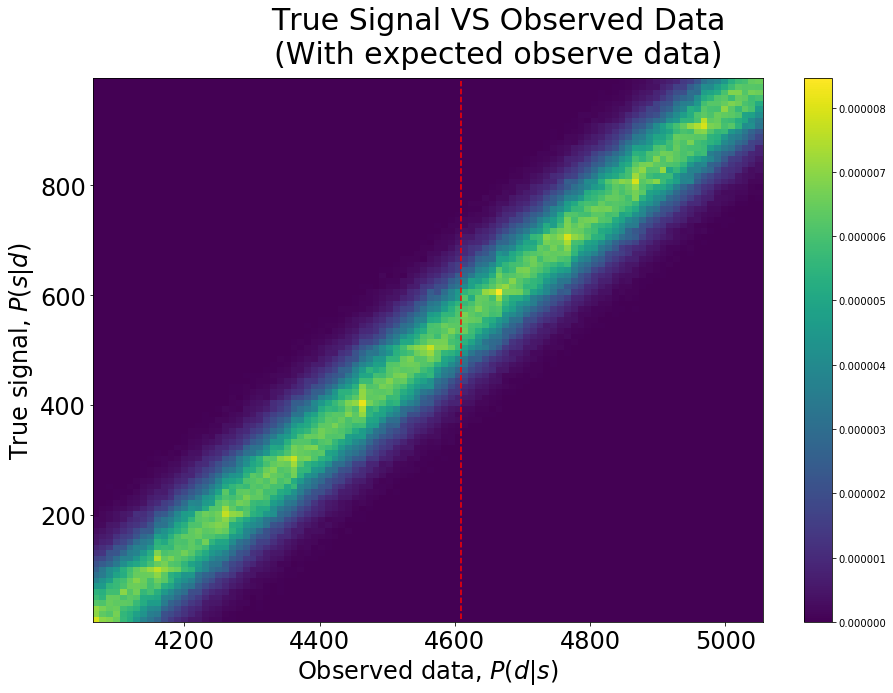

In [330]:
data = sgnl + bkgd

signaledges = np.linspace(0,1000,100)
dataedges = np.linspace(4060, 5060,100)

Psd, temp, temp2= np.histogram2d(data,sgnl, bins=[dataedges,signaledges], density=True)

plt.suptitle('True Signal VS Observed Data\n(With expected observe data)', fontsize=30)
plt.tick_params(labelsize = 24)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.vlines(exp_sgnl + mu_bkgd, 10, 990, colors = 'r', linestyles = 'dashed')
plt.colorbar()
plt.show()

We will be finding the minimum true signal value that allow us to see a signal brigher than what we observed 95% of the time.

In [320]:
print(signalcenters)

[  5.05050505  15.15151515  25.25252525  35.35353535  45.45454545
  55.55555556  65.65656566  75.75757576  85.85858586  95.95959596
 106.06060606 116.16161616 126.26262626 136.36363636 146.46464646
 156.56565657 166.66666667 176.76767677 186.86868687 196.96969697
 207.07070707 217.17171717 227.27272727 237.37373737 247.47474747
 257.57575758 267.67676768 277.77777778 287.87878788 297.97979798
 308.08080808 318.18181818 328.28282828 338.38383838 348.48484848
 358.58585859 368.68686869 378.78787879 388.88888889 398.98989899
 409.09090909 419.19191919 429.29292929 439.39393939 449.49494949
 459.5959596  469.6969697  479.7979798  489.8989899  500.
 510.1010101  520.2020202  530.3030303  540.4040404  550.50505051
 560.60606061 570.70707071 580.80808081 590.90909091 601.01010101
 611.11111111 621.21212121 631.31313131 641.41414141 651.51515152
 661.61616162 671.71717172 681.81818182 691.91919192 702.02020202
 712.12121212 722.22222222 732.32323232 742.42424242 752.52525253
 762.62626263 772.

In [346]:
print(exp_sgnl)
print(signalcenters[53])

549.0
540.4040404040404


It's not computationally efficient to check the integral of all horizontal cuts, so we'll be efficient and start from the signal value that's almost the same as the one we're looking for.
<br>(Expected signal in this case)

In [347]:
s = 53
while s < 99:
    currenthist = Psd[:,s]
    total = np.sum(Psd[:,s])
    add = 0
    d = 98
    while datacenters[d] >= (exp_sgnl + mu_bkgd):
        add += Psd[d,s]
        d = d - 1
    if add/total >= 0.95:
        break
    s = s + 1
print(s)
print(round(signalcenters[s]))

65
662.0


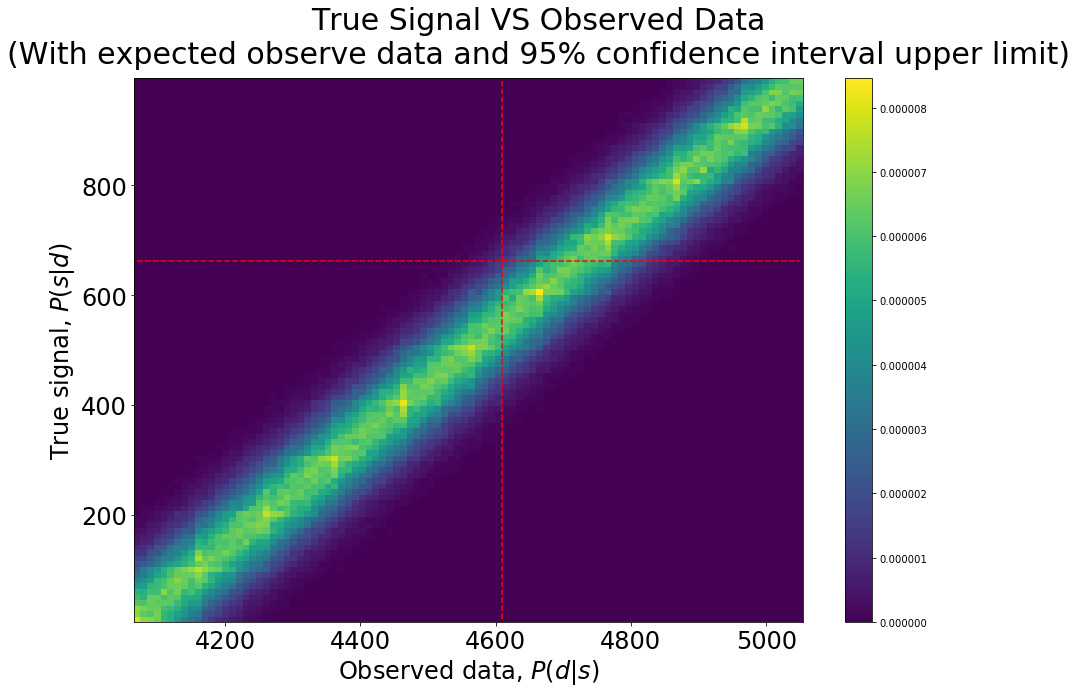

In [335]:
data = sgnl + bkgd

signaledges = np.linspace(0,1000,100)
dataedges = np.linspace(4060, 5060,100)

Psd, temp, temp2= np.histogram2d(data,sgnl, bins=[dataedges,signaledges], density=True)

plt.suptitle('True Signal VS Observed Data\n(With expected observe data and 95% confidence interval upper limit)', fontsize=30)
plt.tick_params(labelsize = 24)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.vlines(exp_sgnl + mu_bkgd, 10, 990, colors = 'r', linestyles = 'dashed')
plt.hlines(round(signalcenters[s]), 4070, 5050, colors = 'r', linestyles = 'dashed')
plt.colorbar()
plt.show()

From our optimization model, we need to have 662 or fewer signal (Higgs) events out of 4060 background (QCD) events events to be unable to observe what we have observed more than 95% of the time.

We'll do the same with the observed data.

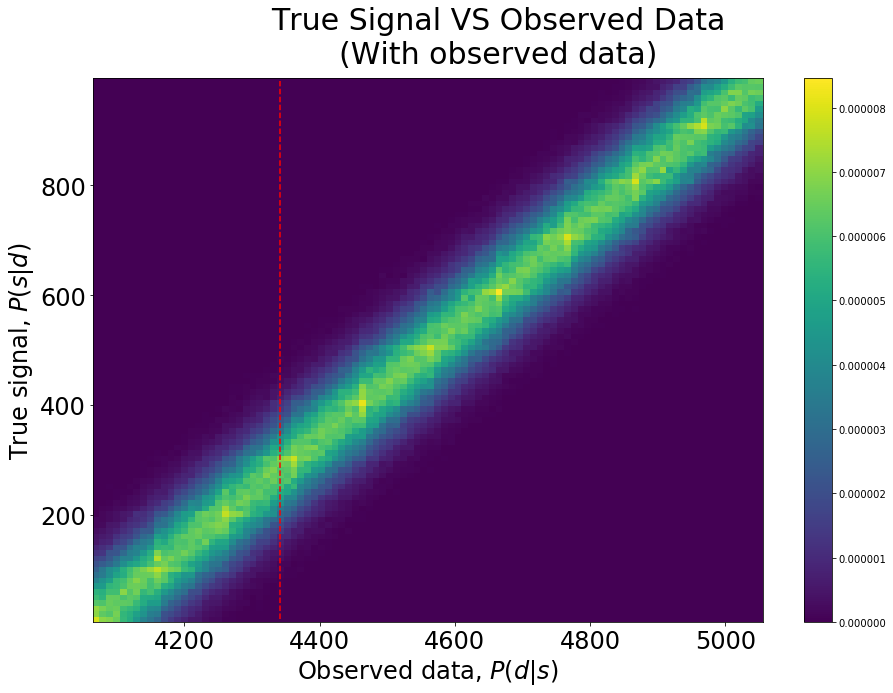

In [338]:
data = sgnl + bkgd

signaledges = np.linspace(0,1000,100)
dataedges = np.linspace(4060, 5060,100)

Psd, temp, temp2= np.histogram2d(data,sgnl, bins=[dataedges,signaledges], density=True)

plt.suptitle('True Signal VS Observed Data\n(With observed data)', fontsize=30)
plt.tick_params(labelsize = 24)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.vlines(obs_sgnl + mu_bkgd, 10, 990, colors = 'r', linestyles = 'dashed')
plt.colorbar()
plt.show()

In [345]:
print(obs_sgnl)
print(signalcenters[27])

282.0
277.7777777777777


In [348]:
s = 27
while s < 99:
    currenthist = Psd[:,s]
    total = np.sum(Psd[:,s])
    add = 0
    d = 98
    while datacenters[d] >= (obs_sgnl + mu_bkgd):
        add += Psd[d,s]
        d = d - 1
    if add/total >= 0.95:
        break
    s = s + 1
print(s)
print(round(signalcenters[s]))

38
389.0


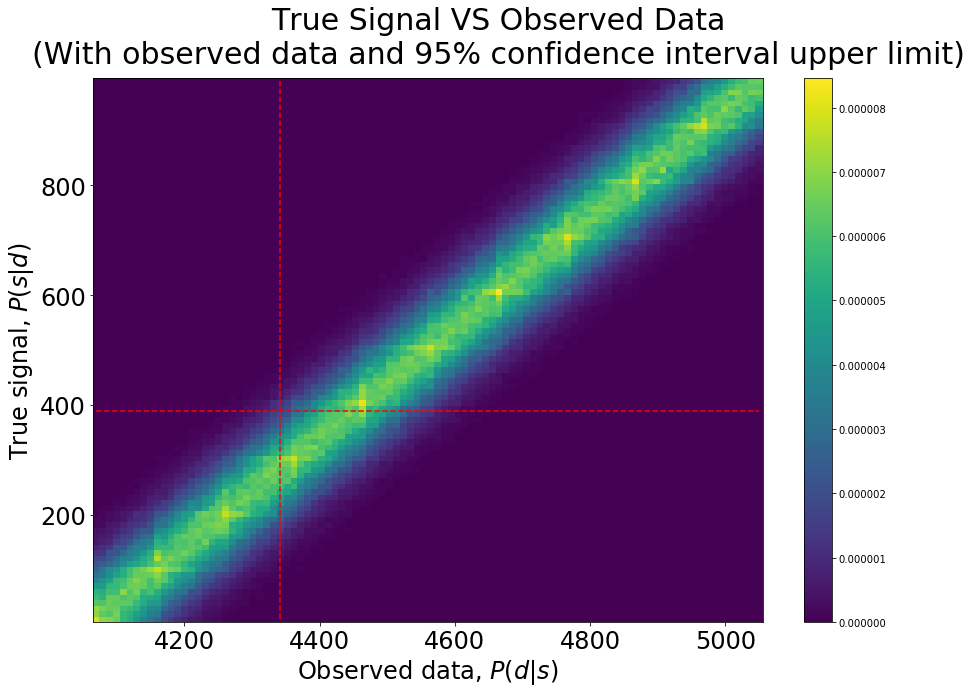

In [349]:
data = sgnl + bkgd

signaledges = np.linspace(0,1000,100)
dataedges = np.linspace(4060, 5060,100)

Psd, temp, temp2= np.histogram2d(data,sgnl, bins=[dataedges,signaledges], density=True)

plt.suptitle('True Signal VS Observed Data\n(With observed data and 95% confidence interval upper limit)', fontsize=30)
plt.tick_params(labelsize = 24)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.vlines(obs_sgnl + mu_bkgd, 10, 990, colors = 'r', linestyles = 'dashed')
plt.hlines(round(signalcenters[s]), 4070, 5050, colors = 'r', linestyles = 'dashed')
plt.colorbar()
plt.show()

From our actual observation, we need to have 389 or fewer signal (Higgs) events out of 4060 background (QCD) events to be unable to observe what we have observed more than 95% of the time.

It's logical that our observed 95% confidence upper limit would be lower for the observed than for the expected significance.
<br>If the number of signal events we are to observe are linearly random, under the same background, it would be harder to miss an observation that's more significant, since there are more true signal values that allow seeing a more significant observed data at least 95% of the time.

# ==End of Lab 08==